In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [3]:
# Remove unnamed feature
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# remove Location and Subject Code
dataset.drop(['Location','Subject Code'], axis=1, inplace = True)


In [4]:
# Change object data type to numeric
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']
for i in objectFeatures:
    dataset[i] = pd.to_numeric(dataset[i],errors = 'coerce')

In [5]:
#clean the NaN data
data = dataset.dropna()
data

month  season  sex  TSV   TP  air_ts  air_tp  RH_ts  RH_tp  comfort  \
0       1.0     1.0  1.0 -1.0 -1.0     0.0     0.0   -1.0   -1.0      4.0   
1       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
2       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
3       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
4       1.0     1.0  1.0  0.0  0.0     0.0     0.0    0.0    0.0      2.0   
...     ...     ...  ...  ...  ...     ...     ...    ...    ...      ...   
2603   12.0     1.0  2.0 -1.0 -1.0     1.0     1.0    1.0   -1.0      3.0   
2604   12.0     1.0  2.0  0.0 -1.0     1.0     1.0   -1.0    0.0      3.0   
2605   12.0     1.0  2.0 -1.0  0.0    -1.0    -1.0   -1.0    0.0      3.0   
2606   12.0     1.0  2.0 -1.0 -1.0     0.0     1.0   -1.0    0.0      3.0   
2607   12.0     1.0  2.0  0.0 -1.0     1.0     1.0   -1.0   -1.0      3.0   

      ...    RH       PMV        PPD  TnG_R_0.5        Tmr        Top  \
0     ...  49.1  0.768705  16.575062  26.948807  25.797614  24.948807   
1     ...  49.7  0.236143   6.148326  26.860770  25.521541  24.860770   
2     ...  49.7  0.246064   6.246280  26.948807  25.797614  24.948807   
3     ...  46.3  0.299259   6.838386  26.843366  25.786732  24.843366   
4     ...  46.5 -0.444504   9.015203  24.755364  25.510728  24.755364   
...   ...   ...       ...        ...        ...        ...        ...   
2603  ...  55.6 -2.470067  92.784269  12.665266   8.930533  10.665266   
2604  ...  55.5 -2.203402  85.036018  13.999499  14.198998  13.999499   
2605  ...  53.8 -1.529404  52.499530  15.498271  12.796541  13.498271   
2606  ...  55.2 -2.096908  80.941691  15.195137  12.190274  13.195137   
2607  ...  59.9 -1.678863  60.617068  13.599293  13.098586  13.599293   

           Tout        Trm  TnG_R_0.25  TnG_R_0.33  
0     18.500000  19.238792   28.948807   27.979110  
1     18.500000  19.238792   28.860770   27.891073  
2     18.500000  19.238792   28.948807   27.979110  
3     18.500000  19.238792   28.843366   27.873669  
4     18.500000  19.238792   24.755364   24.755364  
...         ...        ...         ...         ...  
2603   9.273256   8.107723   14.665266   13.695569  
2604   9.273256   8.107723   13.999499   13.999499  
2605   9.273256   8.107723   17.498271   16.528574  
2606   9.273256   8.107723   17.195137   16.225440  
2607   9.273256   8.107723   13.599293   13.599293  

[2434 rows x 30 columns]

In [6]:
data.TSV.replace({-3 : 0,
                  -2 : 1,
                  -1 : 2,
                   0 : 3,
                   1 : 4,
                   2 : 5,
                   3 : 6}, inplace=True)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10932\2028052787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TSV.replace({-3 : 0,


month  season  sex  TSV   TP  air_ts  air_tp  RH_ts  RH_tp  comfort  \
0       1.0     1.0  1.0  2.0 -1.0     0.0     0.0   -1.0   -1.0      4.0   
1       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
2       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
3       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
4       1.0     1.0  1.0  3.0  0.0     0.0     0.0    0.0    0.0      2.0   
...     ...     ...  ...  ...  ...     ...     ...    ...    ...      ...   
2603   12.0     1.0  2.0  2.0 -1.0     1.0     1.0    1.0   -1.0      3.0   
2604   12.0     1.0  2.0  3.0 -1.0     1.0     1.0   -1.0    0.0      3.0   
2605   12.0     1.0  2.0  2.0  0.0    -1.0    -1.0   -1.0    0.0      3.0   
2606   12.0     1.0  2.0  2.0 -1.0     0.0     1.0   -1.0    0.0      3.0   
2607   12.0     1.0  2.0  3.0 -1.0     1.0     1.0   -1.0   -1.0      3.0   

      ...    RH       PMV        PPD  TnG_R_0.5        Tmr        Top  \
0     ...  49.1  0.768705  16.575062  26.948807  25.797614  24.948807   
1     ...  49.7  0.236143   6.148326  26.860770  25.521541  24.860770   
2     ...  49.7  0.246064   6.246280  26.948807  25.797614  24.948807   
3     ...  46.3  0.299259   6.838386  26.843366  25.786732  24.843366   
4     ...  46.5 -0.444504   9.015203  24.755364  25.510728  24.755364   
...   ...   ...       ...        ...        ...        ...        ...   
2603  ...  55.6 -2.470067  92.784269  12.665266   8.930533  10.665266   
2604  ...  55.5 -2.203402  85.036018  13.999499  14.198998  13.999499   
2605  ...  53.8 -1.529404  52.499530  15.498271  12.796541  13.498271   
2606  ...  55.2 -2.096908  80.941691  15.195137  12.190274  13.195137   
2607  ...  59.9 -1.678863  60.617068  13.599293  13.098586  13.599293   

           Tout        Trm  TnG_R_0.25  TnG_R_0.33  
0     18.500000  19.238792   28.948807   27.979110  
1     18.500000  19.238792   28.860770   27.891073  
2     18.500000  19.238792   28.948807   27.979110  
3     18.500000  19.238792   28.843366   27.873669  
4     18.500000  19.238792   24.755364   24.755364  
...         ...        ...         ...         ...  
2603   9.273256   8.107723   14.665266   13.695569  
2604   9.273256   8.107723   13.999499   13.999499  
2605   9.273256   8.107723   17.498271   16.528574  
2606   9.273256   8.107723   17.195137   16.225440  
2607   9.273256   8.107723   13.599293   13.599293  

[2434 rows x 30 columns]

In [7]:
all_feature = data.columns
len(all_feature)

30

In [8]:
"""
Explore data on 3 section
1. Full Data --> all of parameter in dataset
2. Main Data --> only 6 parameter (ASHRAE-55)
3. Others Data --> exclude main parameter
"""
main_feature = ["Ti", "RH", "Tmr", "Va", "met", "clo"]
target_label = ["TSV"]
others_feature = [x for x in all_feature if x not in (main_feature + target_label)]


In [9]:
full_data = data[main_feature + others_feature + target_label]
main_data = data[main_feature + target_label]
others_data = data[others_feature + target_label]

# Modeling

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance

from datetime import datetime as dt
import time

In [11]:
scaler = StandardScaler()

#Full data
y_full = full_data[['TSV']].values.ravel()
X_full = full_data.drop(['TSV'], axis=1)

full_features = X_full.columns
X_full = pd.DataFrame(scaler.fit_transform(X_full),columns = full_features)

#Main data
y_main = main_data[['TSV']].values.ravel()
X_main = main_data.drop(['TSV'], axis=1)

main_features = X_main.columns
X_main = pd.DataFrame(scaler.fit_transform(X_main),columns = main_features)


#Others data
y_others = others_data[['TSV']].values.ravel()
X_others = others_data.drop(['TSV'], axis=1)

others_features = X_others.columns
X_others = pd.DataFrame(scaler.fit_transform(X_others),columns = others_features)

In [12]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

print(X_full_train.shape, X_full_test.shape)
print(y_full_train.shape, y_full_test.shape)

(1703, 29) (731, 29)
(1703,) (731,)


In [13]:
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, y_main, test_size=0.3, random_state=42)

print(X_main_train.shape, X_main_test.shape)
print(y_main_train.shape, y_main_test.shape)

(1703, 6) (731, 6)
(1703,) (731,)


In [14]:
X_others_train, X_others_test, y_others_train, y_others_test = train_test_split(X_others, y_others, test_size=0.3, random_state=42)

print(X_others_train.shape, X_others_test.shape)
print(y_others_train.shape, y_others_test.shape)

(1703, 23) (731, 23)
(1703,) (731,)


In [15]:
renamed_column = {'month' : 'Month',
                 'season' : 'Season',
                 'sex' : 'Sex',
                 'TSV' : 'Thermal Sensation Vote',
                 'TP' : 'Thermal Preference Vote',
                 'air_ts' : 'Air Sensation Vote',
                 'air_tp' : 'Air Preference Vote',
                 'RH_ts' : 'RH Sensation Vote',
                 'RH_tp' : 'RH Preference Vote',
                 'comfort' : 'Comfortability',
                 'prod' : 'Productivity',
                 'TA' : 'Thermal Acceptibility',
                 'clo' : 'Clothing Insulation',
                 'Uphols' : 'Upholerstery',
                 'clo_tot' : 'Clothing Instulation Total',
                 'met' : 'Metabolism Level',
                 'sh_sw' : 'Sweating/Shivering',
                 'Ti' : 'Indoor Air Temperature',
                 'Tg' : 'Indoor Globe Temperature',
                 'Va' : 'Air Movement',
                 'RH' : 'Relative Humidity',
                 'PMV' : 'Predicted Mean Vote',
                 'PPD' : 'Percentage Peaple Dissatified',
                 'TnG_R_0.5' : "Griffith's Neutral Temp (R-0.50)",
                 'Tmr' : 'Mean Radiant Temperature',
                 'Top' : 'Indoor Operative Temperature',
                 'Tout' : 'Outdoor Mean Temperature',
                 'Trm' : 'Outdoor Running Mean Temperature',
                 'TnG_R_0.25' : "Griffith's Neutral Temp (R-0.25)",
                 'TnG_R_0.33' : "Griffith's Neutral Temp (R-0.33)"}

In [ ]:
main_feature = ["Ti", "RH", "Tmr", "Va", "met", "clo"]

In [138]:
def peformance_report(X_train, y_train, X_test, y_test, model):
    
    # training model
    print("Training model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    training_secs = (time.time() - start_time)
    
    print(f"  Training time : {training_secs} seconds")
    print(f"  Training accuracy : {trainAccuracy}\n")
    
    # testing model
    print("Testing model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testing_secs = (time.time() - start_time)
    
    print(f"  Testing time : {testing_secs} seconds")
    print(f"  Testing accuracy : {testAccuracy}\n")
    
    # error
    error_mse = mean_squared_error(y_test, y_pred, squared = False)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)   
    
    print(f"  MSE   : {error_mse}")
    print(f"  MAE   : {error_mae}")
    print(f"  MAPE  : {error_mape}")
          
    # report
    testReport = classification_report(y_test, y_pred)
    print(f"\nReport :\n{testReport}")
    
    return clf, y_pred
    
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=0)

def confusion_rev(model, y_test, y_pred, n):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(model + " " + n + " feature(s)", pad = 30)
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=0)
    
    
def importance(clf, X_data):
    X_new = X_data
    X_new.rename(renamed_column, axis='columns', inplace=True)
    features_name = X_new.columns
    
    fig, ax = plt.subplots(figsize=(20,16))
    # plot = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
    results = pd.DataFrame({'Features': features_name,
                            'Importances': clf.feature_importances_})
    results.sort_values(by='Importances', inplace=True)
    ax = plt.barh(results['Features'], results['Importances'])
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=15)
    # plt.xlabel('Importance percentages')
    # ax.set_title('Feature Importance')
    # plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    return results
  

# 1. SVM

In [17]:
model_svm = SVC()

## 1.1 SVM full_data

In [18]:
clf_svm_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_svm)

Training model 
  Training time : 1.084702968597412 seconds
  Training accuracy : 0.9653552554315913

Testing model 
  Testing time : 0.5735282897949219 seconds
  Testing accuracy : 0.9015047879616963

  MSE   : 0.3328770246548891
  MAE   : 0.10259917920656635
  MAPE  : 73930500038913.8

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0       0.75      0.70      0.72        60
         2.0       0.92      0.98      0.95       233
         3.0       0.98      0.99      0.98       223
         4.0       0.82      0.99      0.90       165
         5.0       1.00      0.09      0.17        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.56      0.57       731
weighted avg       0.91      0.90      0.88       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
x = 0.3328770246548891
x**(1/2)

0.576954958948174

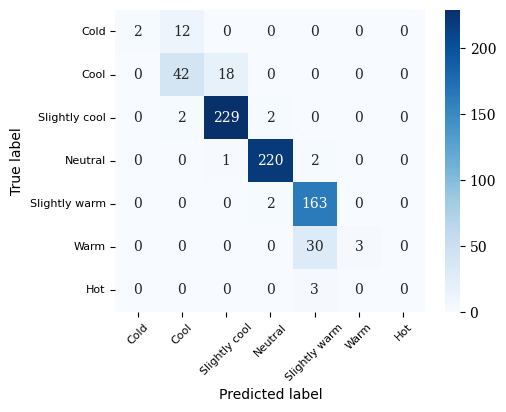

In [19]:
confusion(y_full_test, y_full_pred)

## 1.2 SVM main_data

In [20]:
clf_svm_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_svm)

Training model 
  Training time : 0.8998429775238037 seconds
  Training accuracy : 0.48150322959483266

Testing model 
  Testing time : 0.8127603530883789 seconds
  Testing accuracy : 0.4473324213406293

  MSE   : 1.1034084737384975
  MAE   : 0.7523939808481532
  MAPE  : 215630625113498.72

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.46      0.62      0.53       233
         3.0       0.42      0.60      0.50       223
         4.0       0.48      0.30      0.37       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.45       731
   macro avg       0.19      0.22      0.20       731
weighted avg       0.38      0.45      0.40       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
1.1034084737384975**(1/2)

1.0504325174605447

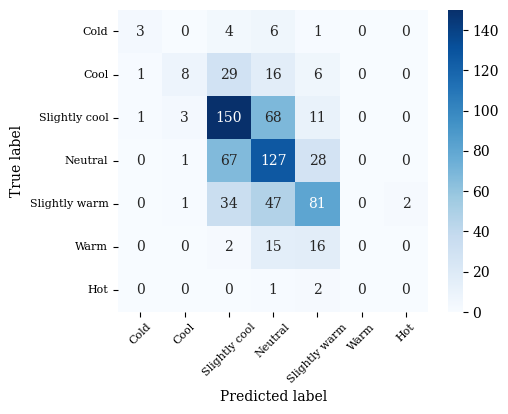

In [115]:
confusion(y_main_test, y_main_pred)

In [23]:
0.3429971702850177**(1/2)

0.5856596027429395

## 1.3 SVM others_data

In [22]:
clf_svm_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_svm)

Training model 
  Training time : 0.7627129554748535 seconds
  Training accuracy : 0.9618320610687023

Testing model 
  Testing time : 0.5415077209472656 seconds
  Testing accuracy : 0.8987688098495212

  MSE   : 0.3429971702850177
  MAE   : 0.106703146374829
  MAPE  : 86252250045399.42


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Report :
              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13        14
         1.0       0.73      0.62      0.67        60
         2.0       0.90      0.99      0.94       233
         3.0       0.99      0.99      0.99       223
         4.0       0.83      0.99      0.91       165
         5.0       1.00      0.12      0.22        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.54      0.55       731
weighted avg       0.90      0.90      0.87       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


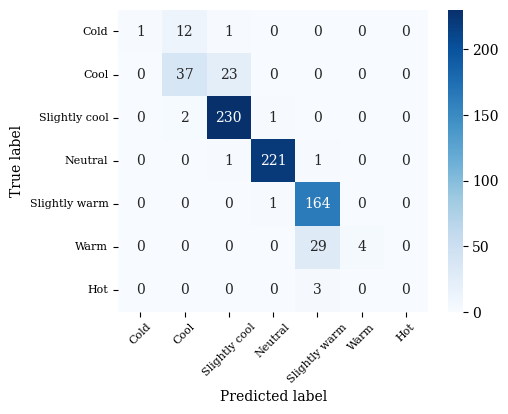

In [23]:
confusion(y_others_test, y_others_pred)

# 2. XGBoost 

In [24]:
from xgboost import XGBClassifier

In [25]:
model_xgb = XGBClassifier()

## 2.1 XGBoost full_data

In [26]:
clf_xgb_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_xgb)

Training model 
  Training time : 4.860549688339233 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.8827028274536133 seconds
  Testing accuracy : 0.9712722298221614

  MSE   : 0.1921866397915419
  MAE   : 0.03146374829001368
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.95      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.88      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



In [20]:
0.1921866397915419**(1/2)

0.4383909668224722

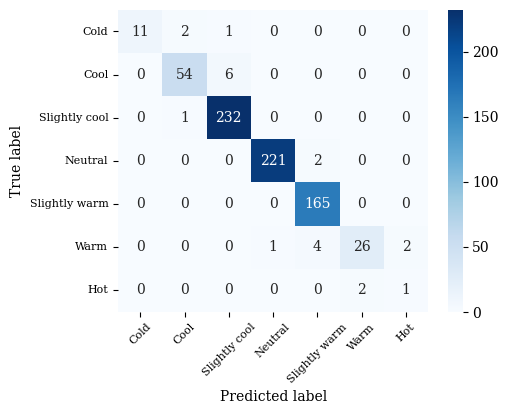

In [27]:
confusion(y_full_test, y_full_pred)

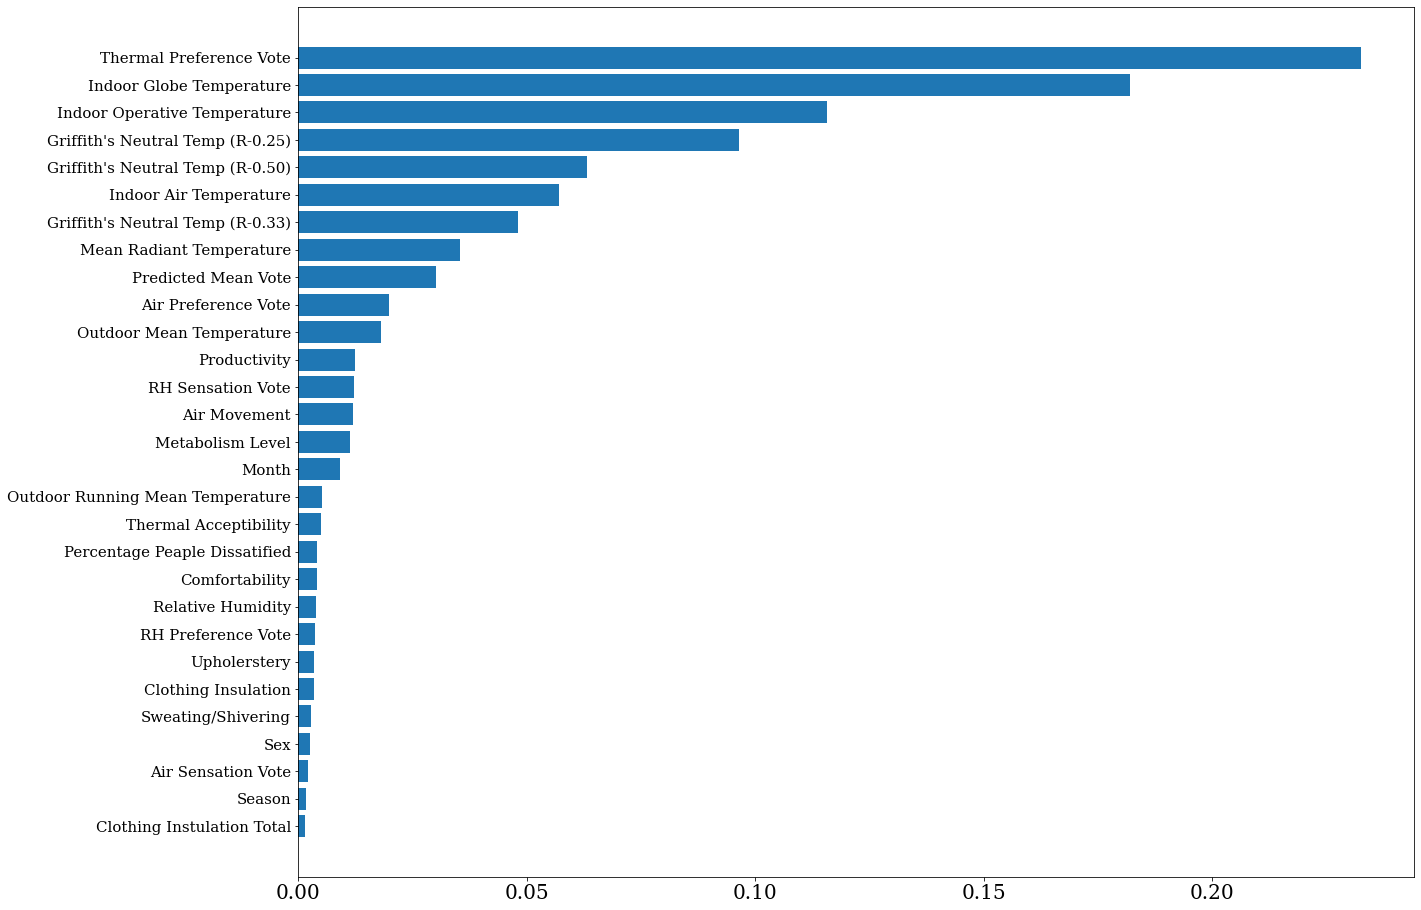

In [29]:
importance_full = importance(clf_xgb_full, X_full)

## 2.2 XGBoost main_data

In [30]:
clf_xgb_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_xgb)

Training model 
  Training time : 1.0029356479644775 seconds
  Training accuracy : 0.9706400469759249

Testing model 
  Testing time : 1.7206141948699951 seconds
  Testing accuracy : 0.48700410396716826

  MSE   : 1.0571882797418488
  MAE   : 0.6935704514363885
  MAPE  : 129378375068099.34

Report :
              precision    recall  f1-score   support

         0.0       0.44      0.29      0.35        14
         1.0       0.38      0.22      0.28        60
         2.0       0.51      0.57      0.54       233
         3.0       0.47      0.55      0.51       223
         4.0       0.52      0.48      0.50       165
         5.0       0.30      0.09      0.14        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.49       731
   macro avg       0.38      0.31      0.33       731
weighted avg       0.48      0.49      0.48       731



In [19]:
1.0571882797418488**(1/2)

1.0281966153133597

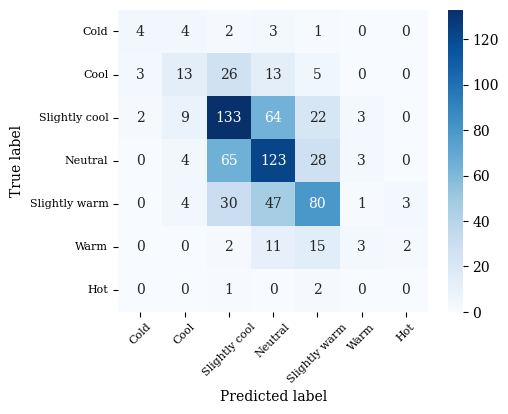

In [31]:
confusion(y_main_test, y_main_pred)

## 2.3 XGBoost others_data

In [32]:
clf_xgb_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_xgb)

Training model 
  Training time : 2.0769505500793457 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.756643295288086 seconds
  Testing accuracy : 0.9699042407660738

  MSE   : 0.1849316803638273
  MAE   : 0.03146374829001368
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       0.99      0.99      0.99       223
         4.0       0.96      0.99      0.98       165
         5.0       0.93      0.82      0.87        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.97       731
   macro avg       0.90      0.83      0.86       731
weighted avg       0.97      0.97      0.97       731



In [16]:
0.1849316803638273**(1/2)

0.43003683605457255

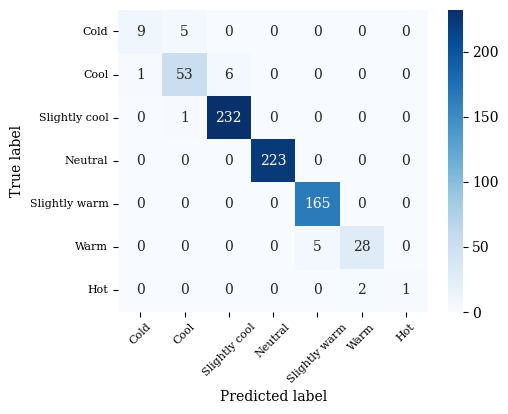

In [110]:
confusion(y_others_test, y_others_pred)

## 2.4 XGBoost Importance  (21 Feature)

In [34]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', "Griffith's Neutral Temp (R-0.33)", 'Mean Radiant Temperature', 'Predicted Mean Vote', 'Air Preference Vote', 'Outdoor Mean Temperature', 'Productivity', 'RH Sensation Vote', 'Air Movement', 'Metabolism Level', 'Month', 'Outdoor Running Mean Temperature', 'Thermal Acceptibility', 'Percentage Peaple Dissatified', 'Comfortability']


20

In [35]:
full_data_renamed = full_data
full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

#Selected data
y_importance = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
X_importance = full_data_renamed[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [36]:
clf_xgb_important, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_xgb)

Training model 
  Training time : 1.5384373664855957 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.9458281993865967 seconds
  Testing accuracy : 0.9753761969904241

  MSE   : 0.15691973428978245
  MAE   : 0.024623803009575923
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.98       731
   macro avg       0.90      0.84      0.86       731
weighted avg       0.97      0.98      0.97       731



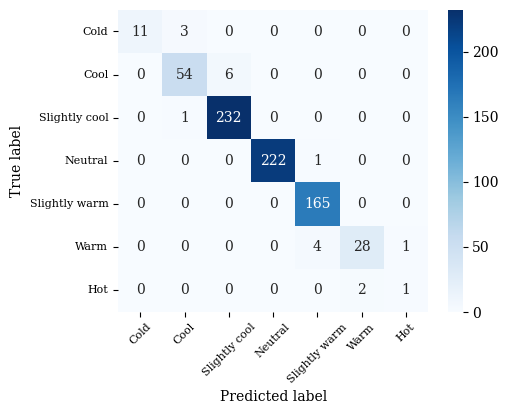

In [37]:
confusion(y_important_test, y_important_pred)

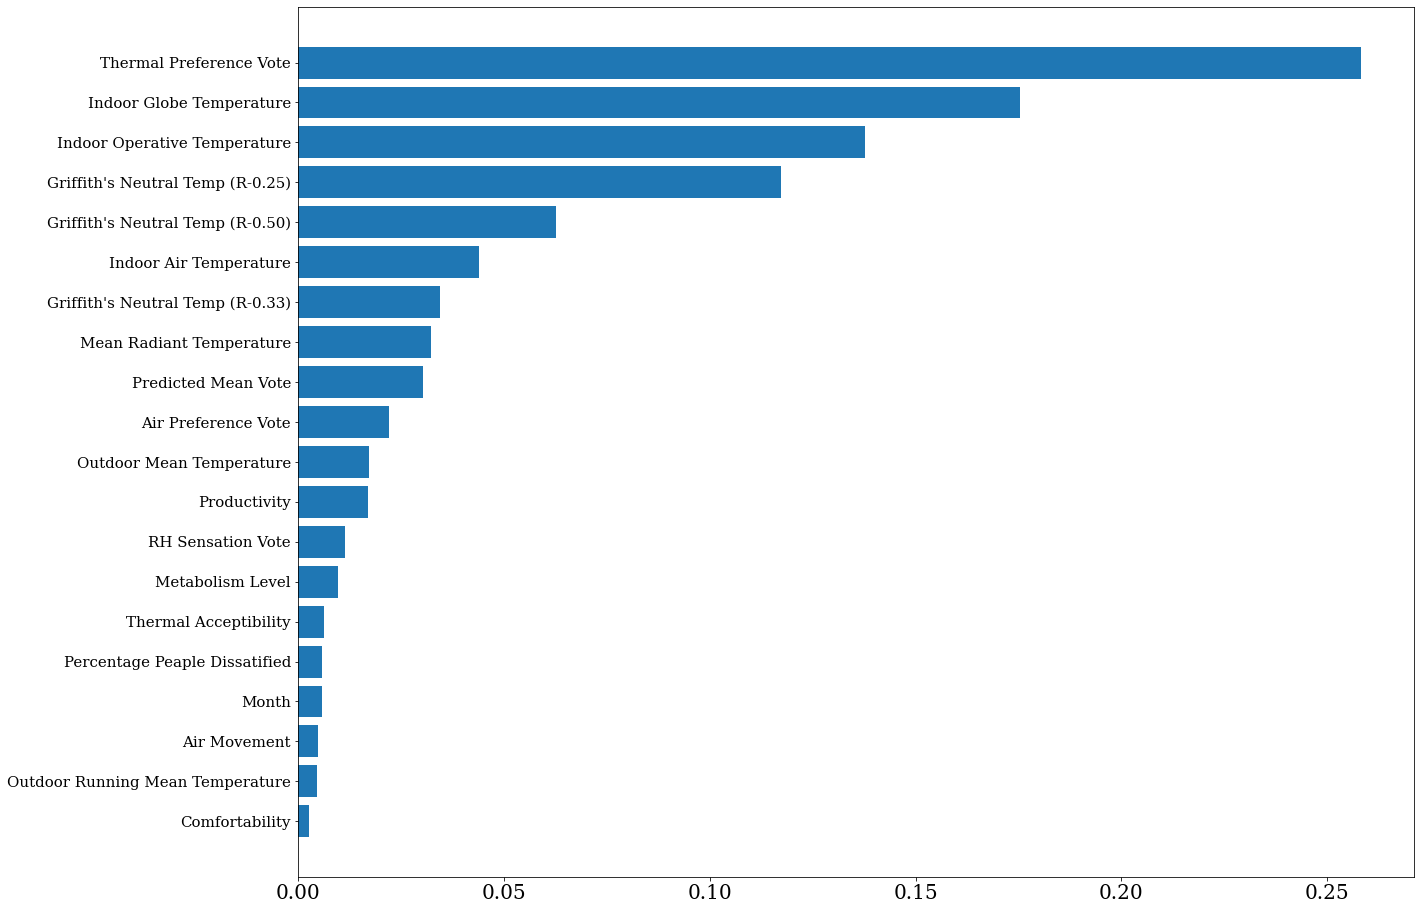

In [38]:
result = importance(clf_xgb_important, X_important)

# 3 
## XGBoost with Hyperparameter Tuning using the random search method in 60 Iteration

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# initial condition
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

In [107]:
model_hyp_rand_60 = XGBClassifier(objective="multi:softmax", tree_method='hist')
clf_hyp_rand_60 = RandomizedSearchCV(estimator=model_hyp_rand_60,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=60,
                             n_jobs=4,
                             verbose=1)


## 3.1 
## XGBoost Full_data with hyperparameter tuning using the random search method in 60 Iteration

In [71]:
clf_full_hyp_rand_60 = clf_hyp_rand_60.fit(X_full_train, y_full_train)
clf_full_hyp_rand_60

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [73]:
full_param = clf_full_hyp_rand_60.best_params_
model_full_param = XGBClassifier(
    colsample_bytree = full_param['colsample_bytree'], 
    colsample_bylevel = full_param["colsample_bylevel"],
    learning_rate = full_param["learning_rate"],
    max_depth = full_param["max_depth"],
    n_estimators = full_param["n_estimators"],
    num_class = full_param["num_class"],
    subsample = full_param["subsample"]
)

In [74]:
clf_full_param, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_full_param)

Training model 
  Training time : 2.2400689125061035 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.5013461112976074 seconds
  Testing accuracy : 0.9740082079343365

  MSE   : 0.16121970123301765
  MAE   : 0.025991792065663474
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        14
         1.0       0.93      0.87      0.90        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.94      0.88      0.91        33
         6.0       1.00      0.33      0.50         3

    accuracy                           0.97       731
   macro avg       0.96      0.84      0.87       731
weighted avg       0.97      0.97      0.97       731



In [15]:
0.16121970123301765**1/2

0.08060985061650883

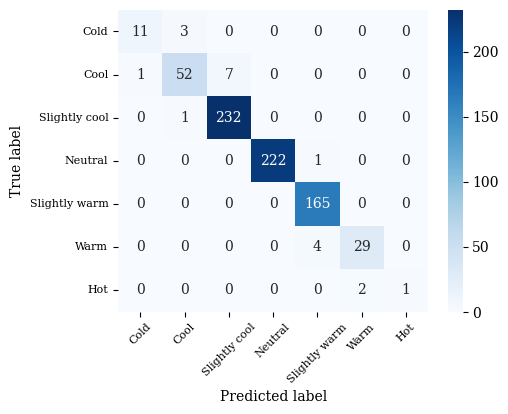

In [75]:
confusion(y_full_test, y_full_pred)

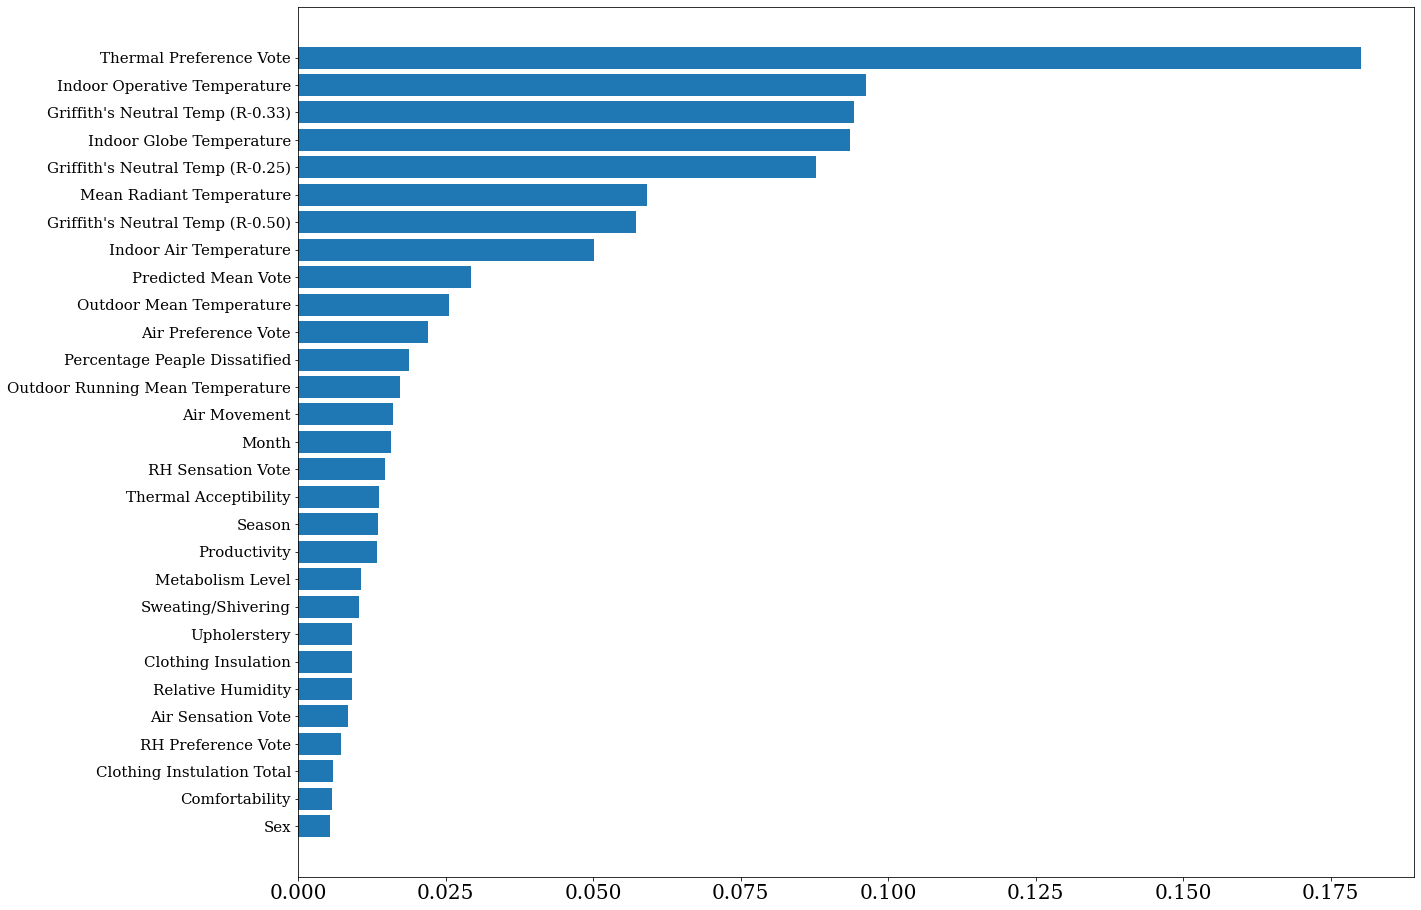

In [76]:
importance_full_hyp_rand_60 = importance(clf_full_param, X_full)

## 3.2
## XGBoost main_data with hyperparameter tuning using the random search method in 60 Iteration

In [77]:
clf_main_hyp_rand_60 = clf_hyp_rand_60.fit(X_main_train, y_main_train)
clf_main_hyp_rand_60

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [78]:
main_param = clf_main_hyp_rand_60.best_params_
model_main_param = XGBClassifier(
    colsample_bytree = main_param['colsample_bytree'], 
    colsample_bylevel = main_param["colsample_bylevel"],
    learning_rate = main_param["learning_rate"],
    max_depth = main_param["max_depth"],
    n_estimators = main_param["n_estimators"],
    num_class = main_param["num_class"],
    subsample = main_param["subsample"]
)

In [79]:
clf_main_param, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_main_param)

Training model 
  Training time : 3.3271169662475586 seconds
  Training accuracy : 0.8214914856136231

Testing model 
  Testing time : 4.847522974014282 seconds
  Testing accuracy : 0.5047879616963065

  MSE   : 1.0216533902428953
  MAE   : 0.6607387140902873
  MAPE  : 184826250097284.62

Report :
              precision    recall  f1-score   support

         0.0       0.60      0.21      0.32        14
         1.0       0.62      0.13      0.22        60
         2.0       0.52      0.64      0.58       233
         3.0       0.45      0.57      0.50       223
         4.0       0.56      0.49      0.52       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.50       731
   macro avg       0.39      0.29      0.31       731
weighted avg       0.49      0.50      0.48       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
1.0216533902428953**(1/2)

1.0107687125365996

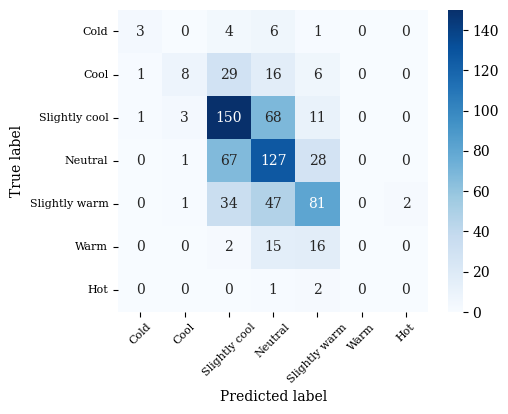

In [80]:
confusion(y_main_test, y_main_pred)

## 3.3
## ## XGBoost others_data with hyperparameter tuning using the random search method in 60 Iteration

In [81]:
clf_others_hyp_rand_60 = clf_hyp_rand_60.fit(X_others_train, y_others_train)
clf_others_hyp_rand_60

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [82]:
others_param = clf_others_hyp_rand_60.best_params_
model_others_param = XGBClassifier(
    colsample_bytree = others_param['colsample_bytree'], 
    colsample_bylevel = others_param["colsample_bylevel"],
    learning_rate = others_param["learning_rate"],
    max_depth = others_param["max_depth"],
    n_estimators = others_param["n_estimators"],
    num_class = others_param["num_class"],
    subsample = others_param["subsample"]
)

In [83]:
clf_others_param, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_others_param)

Training model 
  Training time : 8.7091543674469 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 8.24272894859314 seconds
  Testing accuracy : 0.9726402188782489

  MSE   : 0.16540792339471233
  MAE   : 0.027359781121751026
  MAPE  : 30804375016214.074

Report :
              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75        14
         1.0       0.90      0.88      0.89        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       1.00      0.33      0.50         3

    accuracy                           0.97       731
   macro avg       0.95      0.81      0.86       731
weighted avg       0.97      0.97      0.97       731



In [12]:
0.16540792339471233**(0.5)

0.4067037292608863

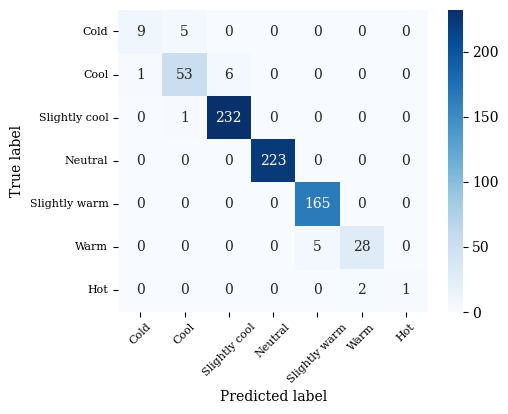

In [84]:
confusion(y_others_test, y_others_pred)

## 3.4
## XGBoost importance with hyperparameter tuning using the random search method in 60 Iteration

In [85]:
importance_feature = importance_full_hyp_rand_60.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.33)", 'Indoor Globe Temperature', "Griffith's Neutral Temp (R-0.25)", 'Mean Radiant Temperature', "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', 'Predicted Mean Vote', 'Outdoor Mean Temperature', 'Air Preference Vote', 'Percentage Peaple Dissatified', 'Outdoor Running Mean Temperature', 'Air Movement', 'Month', 'RH Sensation Vote', 'Thermal Acceptibility', 'Season', 'Productivity', 'Metabolism Level']


20

In [86]:
full_data_renamed = full_data
full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

#Selected data
y_importance = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
X_importance = full_data_renamed[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [87]:
clf_important_hyp_rand_60 = clf_hyp_rand_60.fit(X_important_train, y_important_train)
clf_important_hyp_rand_60

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [88]:
important_param = clf_important_hyp_rand_60.best_params_
model_important_param = XGBClassifier(
    colsample_bytree = important_param['colsample_bytree'], 
    colsample_bylevel = important_param["colsample_bylevel"],
    learning_rate = important_param["learning_rate"],
    max_depth = important_param["max_depth"],
    n_estimators = important_param["n_estimators"],
    num_class = important_param["num_class"],
    subsample = important_param["subsample"]
)

In [89]:
clf_important_param, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_important_param)

Training model 
  Training time : 12.593810558319092 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 13.195368528366089 seconds
  Testing accuracy : 0.9781121751025992

  MSE   : 0.14794534429106182
  MAE   : 0.02188782489740082
  MAPE  : 12321750006485.637

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        14
         1.0       0.95      0.88      0.91        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      1.00      1.00       223
         4.0       0.98      1.00      0.99       165
         5.0       0.94      0.88      0.91        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.98       731
   macro avg       0.90      0.85      0.87       731
weighted avg       0.98      0.98      0.98       731



In [ ]:
confusion(y_important_test, y_important_pred)

# 4
## Compare SVM - XGBoost - XGBoost Hyperparam

In [91]:
importance_feature = importance_full_hyp_rand_60.sort_values(by=['Importances'], ascending=False)
# importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.33)", 'Indoor Globe Temperature', "Griffith's Neutral Temp (R-0.25)", 'Mean Radiant Temperature', "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', 'Predicted Mean Vote', 'Outdoor Mean Temperature', 'Air Preference Vote', 'Percentage Peaple Dissatified', 'Outdoor Running Mean Temperature', 'Air Movement', 'Month', 'RH Sensation Vote', 'Thermal Acceptibility', 'Season', 'Productivity', 'Metabolism Level', 'Sweating/Shivering', 'Upholerstery', 'Clothing Insulation', 'Relative Humidity', 'Air Sensation Vote', 'RH Preference Vote', 'Clothing Instulation Total', 'Comfortability', 'Sex']


29

In [ ]:
['Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.33)", 'Indoor Globe Temperature', "Griffith's Neutral Temp (R-0.25)", 'Mean Radiant Temperature', "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', 'Predicted Mean Vote', 'Outdoor Mean Temperature', 'Air Preference Vote', 'Percentage Peaple Dissatified', 'Outdoor Running Mean Temperature', 'Air Movement', 'Month', 'RH Sensation Vote', 'Thermal Acceptibility', 'Season', 'Productivity', 'Metabolism Level', 'Sweating/Shivering', 'Upholerstery', 'Clothing Insulation', 'Relative Humidity', 'Air Sensation Vote', 'RH Preference Vote', 'Clothing Instulation Total', 'Comfortability', 'Sex']

In [ ]:
Thermal Sensation Vote
Thermal Preference Vote
Air Sensation Vote
Air Preference Vote
RH Sensation Vote
RH Preference Vote
Comfortability
Productivity
Thermal Acceptibility

## 4.1
## Metode mencari best param tiap penambahan feature

In [92]:
featureNum = []

# XGBoost data
trainAcc_xgb = []
testAcc_xgb = []
MSE_xgb = []
MAE_xgb = []
MAPE_xgb = []

# SVM data
trainAcc_svm = []
testAcc_svm = []
MSE_svm = []
MAE_svm = []
MAPE_svm = []

# XGBoost with parameter tuning data
trainAcc_xgb_hyp = []
testAcc_xgb_hyp = []
MSE_xgb_hyp = []
MAE_xgb_hyp = []
MAPE_xgb_hyp = []


model_xgb = XGBClassifier()
model_svm = SVC()

for i in range(len(importance_features)):
    featureNum.append(i + 1)
#     y = data[['TSV']].values.ravel()
#     x = data[importance_features[0:i + 1]]
    
    full_data_renamed = full_data
    full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

    #Selected data
    y = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
    x = full_data_renamed[importance_features[0:i+1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    # Xgboost
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb.append(mean_squared_error(y_test, y_pred))
    MAE_xgb.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # SVM
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_svm.append(accuracy_score(y_train, y_pred))
    
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_svm.append(accuracy_score(y_test, y_pred))
    
    MSE_svm.append(mean_squared_error(y_test, y_pred))
    MAE_svm.append(mean_absolute_error(y_test, y_pred))
    MAPE_svm.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # XGBoost with parameter tuning using random seacrh
    clf_hyp_rand_60 = clf_hyp_rand_60.fit(X_train, y_train)
    
    full_param = clf_hyp_rand_60.best_params_
    model_full_param = XGBClassifier(
        colsample_bytree = full_param['colsample_bytree'], 
        colsample_bylevel = full_param["colsample_bylevel"],
        learning_rate = full_param["learning_rate"],
        max_depth = full_param["max_depth"],
        n_estimators = full_param["n_estimators"],
        num_class = full_param["num_class"],
        subsample = full_param["subsample"]
    )
    
    
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb_hyp.append(accuracy_score(y_train, y_pred))
    
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb_hyp.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb_hyp.append(mean_squared_error(y_test, y_pred))
    MAE_xgb_hyp.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb_hyp.append(mean_absolute_percentage_error(y_test, y_pred))
    
    print(i+1)
    

Fitting 5 folds for each of 60 candidates, totalling 300 fits
1
Fitting 5 folds for each of 60 candidates, totalling 300 fits
2
Fitting 5 folds for each of 60 candidates, totalling 300 fits
3
Fitting 5 folds for each of 60 candidates, totalling 300 fits
4
Fitting 5 folds for each of 60 candidates, totalling 300 fits
5
Fitting 5 folds for each of 60 candidates, totalling 300 fits
6
Fitting 5 folds for each of 60 candidates, totalling 300 fits
7
Fitting 5 folds for each of 60 candidates, totalling 300 fits
8
Fitting 5 folds for each of 60 candidates, totalling 300 fits
9
Fitting 5 folds for each of 60 candidates, totalling 300 fits
10
Fitting 5 folds for each of 60 candidates, totalling 300 fits
11
Fitting 5 folds for each of 60 candidates, totalling 300 fits
12
Fitting 5 folds for each of 60 candidates, totalling 300 fits
13
Fitting 5 folds for each of 60 candidates, totalling 300 fits
14
Fitting 5 folds for each of 60 candidates, totalling 300 fits
15
Fitting 5 folds for each of 60 can

In [93]:
data_comp = {'featureNum': featureNum,
             'trainAcc_xgb': trainAcc_xgb,
             "testAcc_xgb" : testAcc_xgb,
             "MSE_xgb" : MSE_xgb,
             "MAE_xgb" : MAE_xgb,
             "MAPE_xgb" : MAPE_xgb,
             "trainAcc_svm" : trainAcc_svm,
             "testAcc_svm" : testAcc_svm,
             "MSE_svm" : MSE_svm,
             "MAE_svm" : MAE_svm,
             "MAPE_svm" : MAPE_svm,
             "trainAcc_xgb_hyp" : trainAcc_xgb_hyp,
             "testAcc_xgb_hyp" : testAcc_xgb_hyp,
             "MSE_xgb_hyp" : MSE_xgb_hyp,
             "MAE_xgb_hyp" : MAE_xgb_hyp,
             "MAPE_xgb_hyp" : MAPE_xgb_hyp
            } 
comp_table = pd.DataFrame.from_dict(data_comp)
comp_table

featureNum  trainAcc_xgb  testAcc_xgb   MSE_xgb   MAE_xgb      MAPE_xgb  \
0            1      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1            2      0.790370     0.533516  1.175103  0.660739  1.909871e+14   
2            3      1.000000     0.965800  0.034200  0.034200  1.848263e+13   
3            4      1.000000     0.964432  0.035568  0.035568  1.848263e+13   
4            5      1.000000     0.975376  0.024624  0.024624  1.232175e+13   
5            6      1.000000     0.971272  0.028728  0.028728  1.232175e+13   
6            7      1.000000     0.975376  0.024624  0.024624  6.160875e+12   
7            8      1.000000     0.976744  0.023256  0.023256  6.160875e+12   
8            9      1.000000     0.972640  0.027360  0.027360  1.232175e+13   
9           10      1.000000     0.974008  0.034200  0.028728  2.464350e+13   
10          11      1.000000     0.972640  0.027360  0.027360  1.232175e+13   
11          12      1.000000     0.974008  0.025992  0.025992  1.848263e+13   
12          13      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
13          14      1.000000     0.974008  0.025992  0.025992  1.848263e+13   
14          15      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
15          16      1.000000     0.975376  0.028728  0.025992  2.464350e+13   
16          17      1.000000     0.975376  0.028728  0.025992  2.464350e+13   
17          18      1.000000     0.974008  0.034200  0.028728  2.464350e+13   
18          19      1.000000     0.974008  0.030096  0.027360  1.232175e+13   
19          20      1.000000     0.972640  0.031464  0.028728  2.464350e+13   
20          21      1.000000     0.975376  0.024624  0.024624  1.232175e+13   
21          22      1.000000     0.975376  0.028728  0.025992  1.848263e+13   
22          23      1.000000     0.971272  0.032832  0.030096  2.464350e+13   
23          24      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
24          25      1.000000     0.971272  0.036936  0.031464  2.464350e+13   
25          26      1.000000     0.971272  0.036936  0.031464  2.464350e+13   
26          27      1.000000     0.974008  0.034200  0.028728  2.464350e+13   
27          28      1.000000     0.969904  0.034200  0.031464  1.848263e+13   
28          29      1.000000     0.972640  0.031464  0.028728  1.848263e+13   

    trainAcc_svm  testAcc_svm   MSE_svm   MAE_svm      MAPE_svm  \
0       0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1       0.459777     0.459644  1.098495  0.712722  2.094698e+14   
2       0.967704     0.971272  0.028728  0.028728  8.625225e+13   
3       0.970053     0.971272  0.028728  0.028728  8.625225e+13   
4       0.989430     0.994528  0.005472  0.005472  6.160875e+12   
5       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
6       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
7       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
8       0.979448     0.980848  0.019152  0.019152  6.776963e+13   
9       0.972989     0.976744  0.023256  0.023256  8.625225e+13   
10      0.968291     0.969904  0.030096  0.030096  8.625225e+13   
11      0.907810     0.887825  0.116279  0.113543  8.625225e+13   
12      0.896653     0.878249  0.129959  0.124487  8.625225e+13   
13      0.876101     0.860465  0.151847  0.143639  9.241313e+13   
14      0.872578     0.852257  0.160055  0.151847  9.241313e+13   
15      0.867880     0.845417  0.170999  0.160055  9.241313e+13   
16      0.867880     0.846785  0.169631  0.158687  9.241313e+13   
17      0.866706     0.844049  0.172367  0.161423  9.241313e+13   
18      0.867293     0.844049  0.172367  0.161423  9.241313e+13   
19      0.865531     0.844049  0.172367  0.161423  9.241313e+13   
20      0.864944     0.844049  0.172367  0.161423  9.241313e+13   
21      0.864944     0.844049  0.172367  0.161423  9.241313e+13   
22      0.865531     0.844049  0.172367  0.161423  9.241313e+13   
23      0.866706     0.84

In [94]:
comp_table.to_csv('compare_hyp_rand_60_1per1.csv')

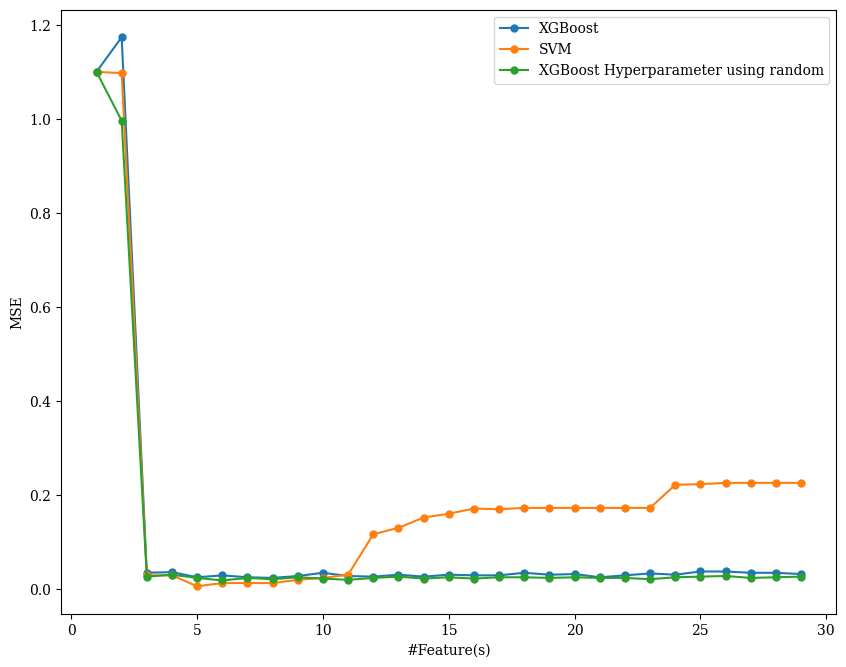

In [96]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

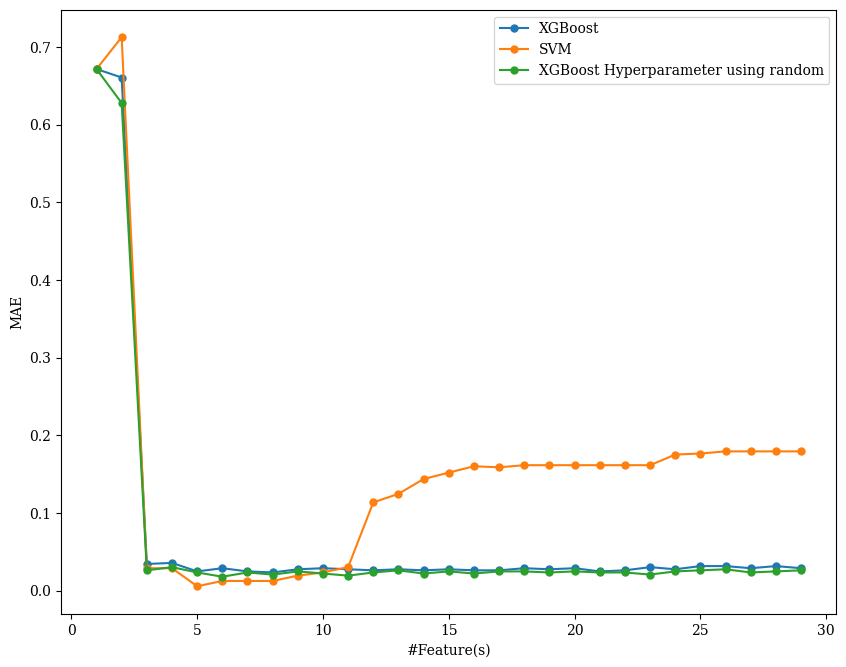

In [97]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["MAE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MAE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MAE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()

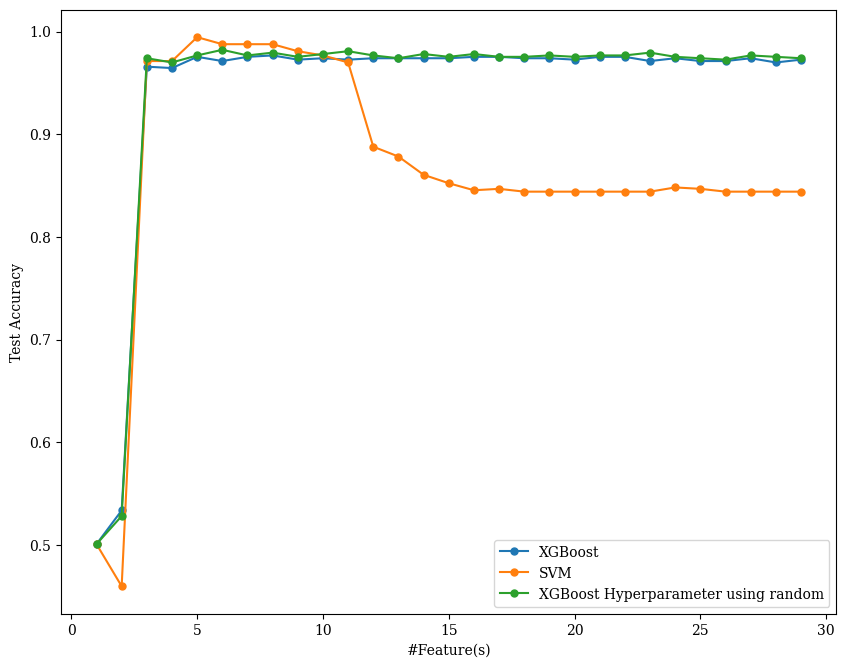

In [103]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["testAcc_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["testAcc_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["testAcc_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

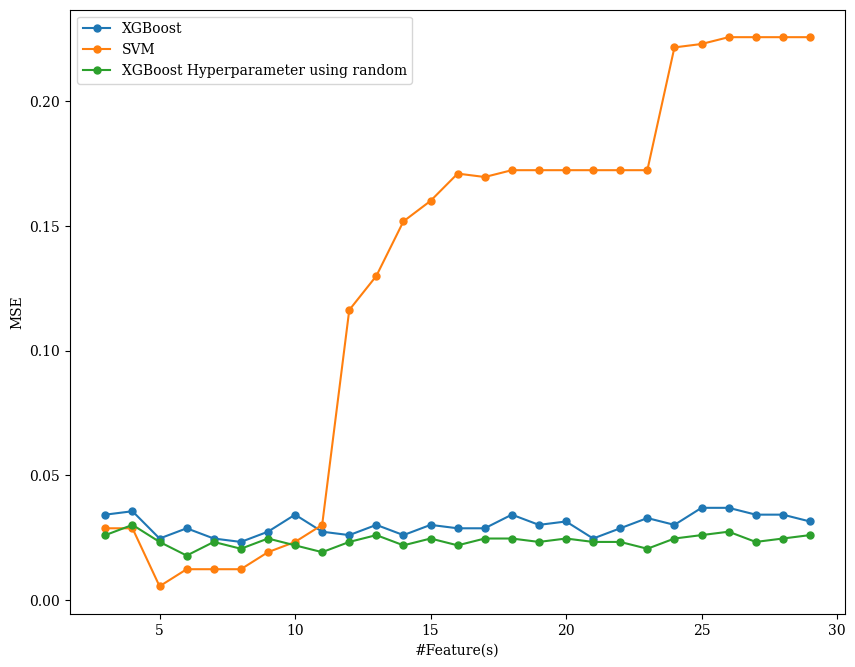

In [105]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][2:29], comp_table["MSE_xgb"][2:29], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MSE_svm"][2:29], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MSE_xgb_hyp"][2:29], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

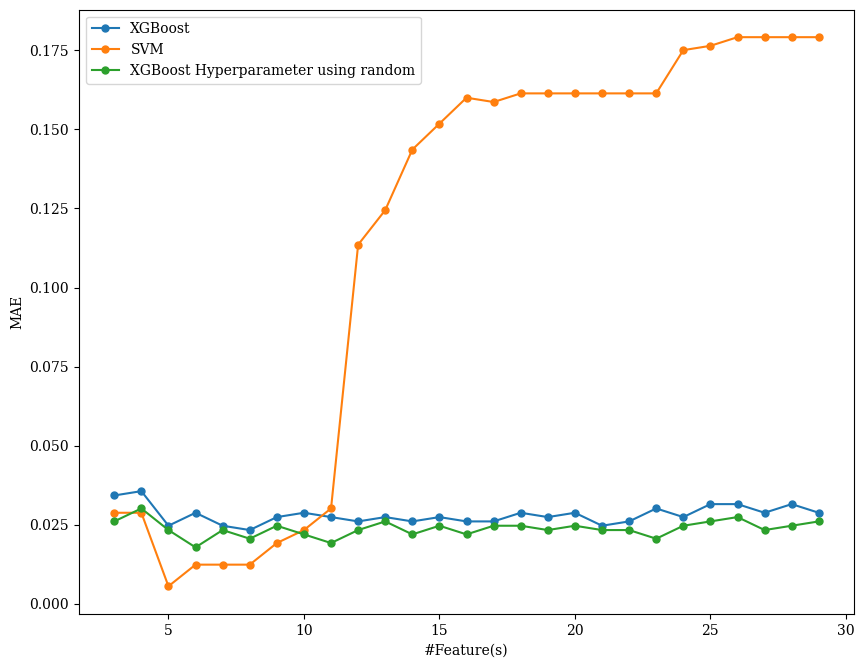

In [104]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][2:29], comp_table["MAE_xgb"][2:29], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MAE_svm"][2:29], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MAE_xgb_hyp"][2:29], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()

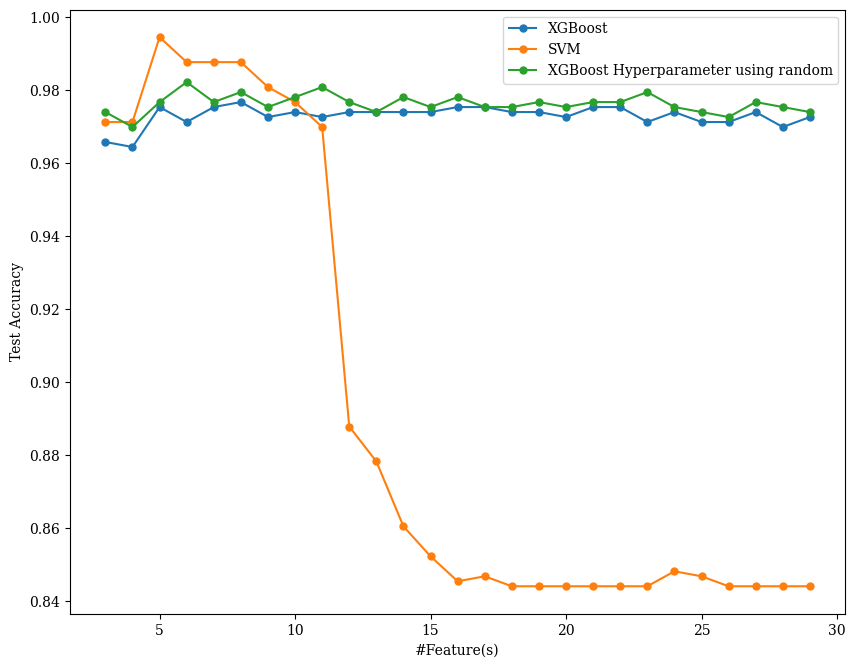

In [106]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][2:29], comp_table["testAcc_xgb"][2:29], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["testAcc_svm"][2:29], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["testAcc_xgb_hyp"][2:29], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

In [ ]:
def peformance_report(X_train, y_train, X_test, y_test, model):
    
    # training model
    print("Training model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    training_secs = (time.time() - start_time)
    
    print(f"  Training time : {training_secs} seconds")
    print(f"  Training accuracy : {trainAccuracy}\n")
    
    # testing model
    print("Testing model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testing_secs = (time.time() - start_time)
    
    print(f"  Testing time : {testing_secs} seconds")
    print(f"  Testing accuracy : {testAccuracy}\n")
    
    # error
    error_mse = mean_squared_error(y_test, y_pred, squared = False)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)   
    
    print(f"  MSE   : {error_mse}")
    print(f"  MAE   : {error_mae}")
    print(f"  MAPE  : {error_mape}")
          
    # report
    testReport = classification_report(y_test, y_pred)
    print(f"\nReport :\n{testReport}")
    
    return clf, y_pred

Confusion Matrix XGBoost dengan jumlah feature :  1
Confusion Matrix SVM dengan jumlah feature :  1
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  1
Confusion Matrix XGBoost dengan jumlah feature :  2
Confusion Matrix SVM dengan jumlah feature :  2
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  2
Confusion Matrix XGBoost dengan jumlah feature :  3
Confusion Matrix SVM dengan jumlah feature :  3
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  3
Confusion Matrix XGBoost dengan jumlah feature :  4
Confusion Matrix SVM dengan jumlah feature :  4
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  4
Confusion Matrix XGBoost dengan jumlah feature :  5
Confusion Matrix SVM dengan jumlah feature :  5


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10932\3462408280.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,4), dpi=100)


Confusion Matrix XGBoost hyperparam dengan jumlah feature :  7
Confusion Matrix XGBoost dengan jumlah feature :  8
Confusion Matrix SVM dengan jumlah feature :  8
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  8
Confusion Matrix XGBoost dengan jumlah feature :  9
Confusion Matrix SVM dengan jumlah feature :  9
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  9
Confusion Matrix XGBoost dengan jumlah feature :  10
Confusion Matrix SVM dengan jumlah feature :  10
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  10
Confusion Matrix XGBoost dengan jumlah feature :  11
Confusion Matrix SVM dengan jumlah feature :  11
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Confusion Matrix XGBoost hyperparam dengan jumlah feature :  11
Confusion Matrix XGBoost dengan

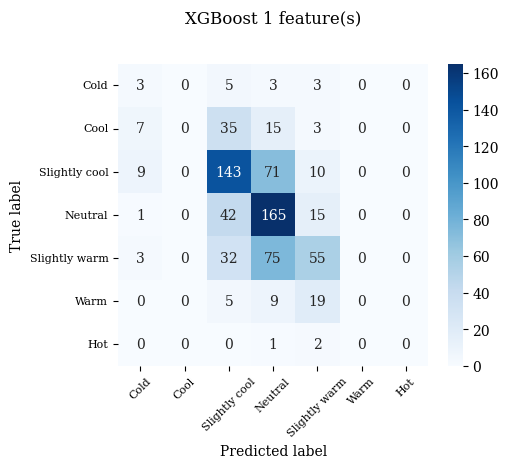

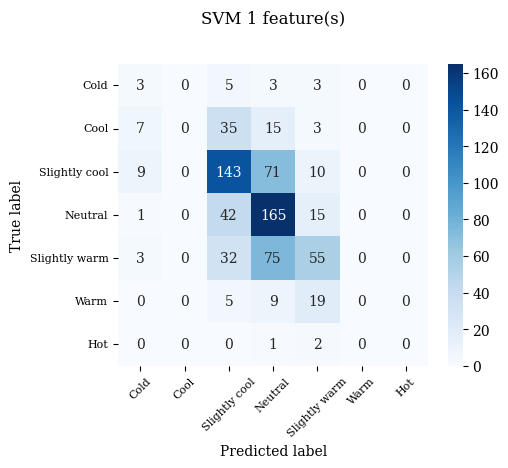

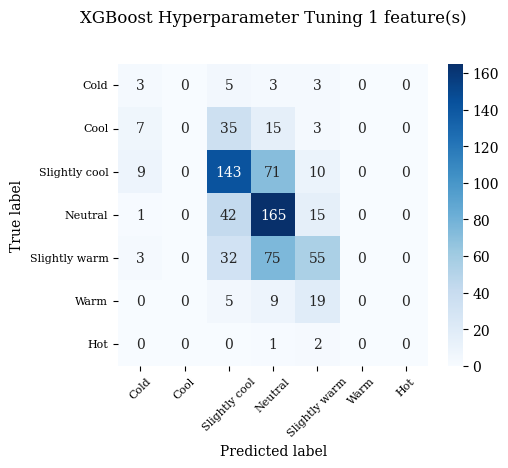

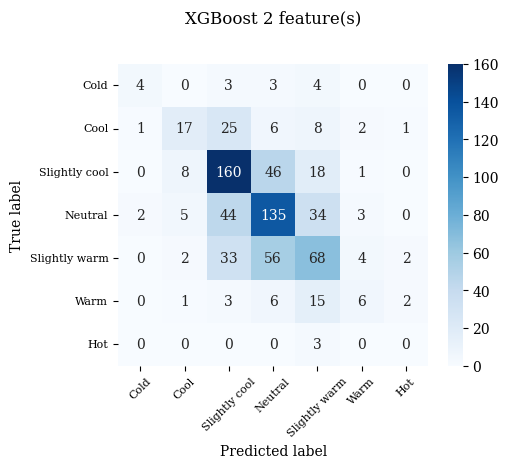

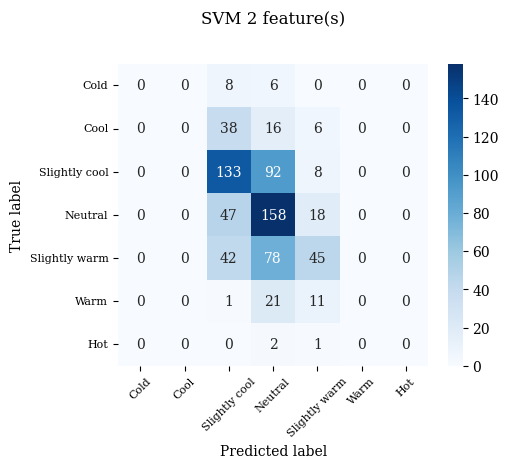

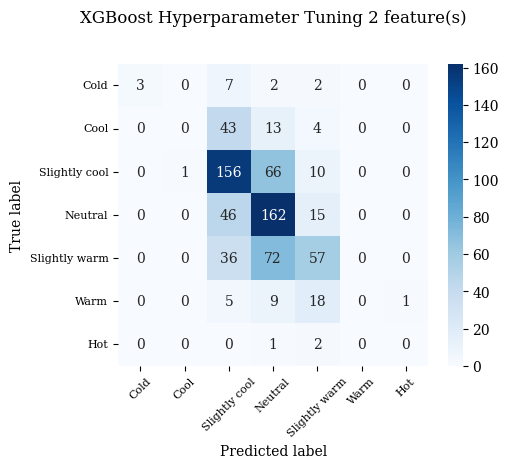

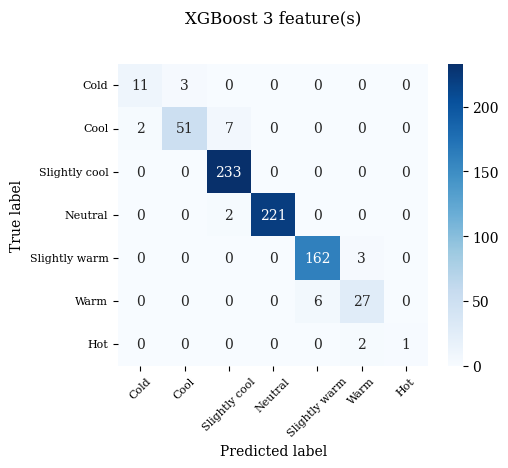

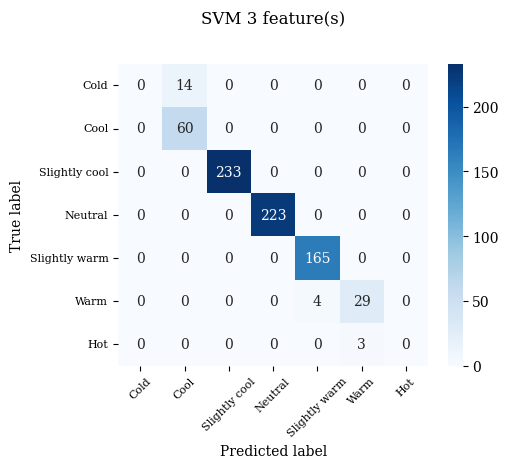

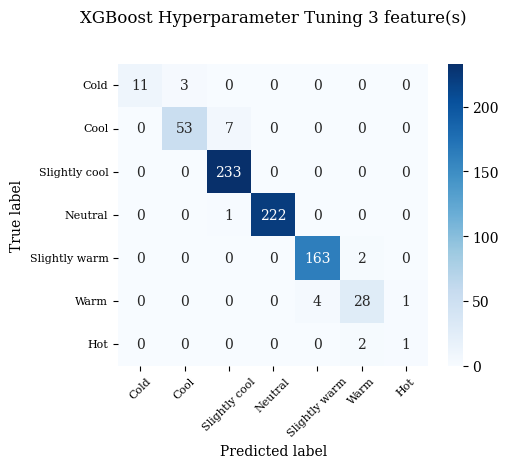

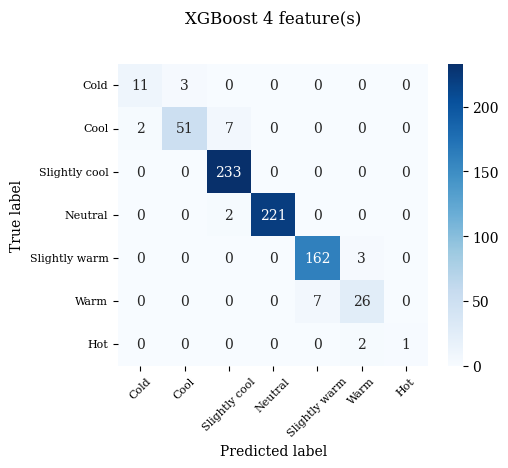

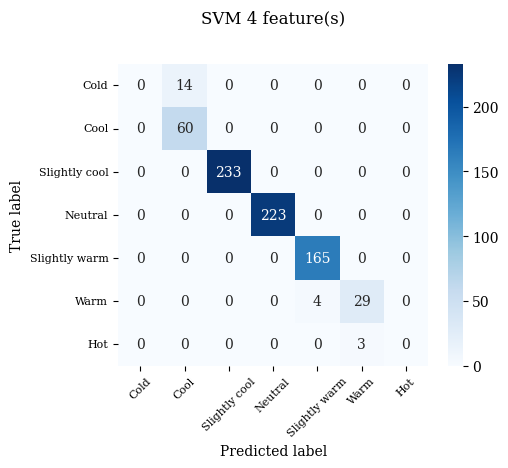

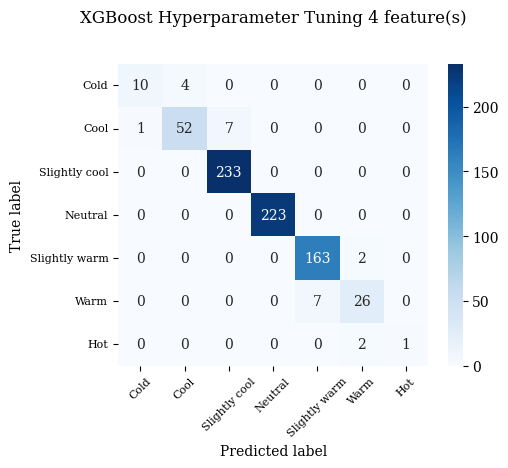

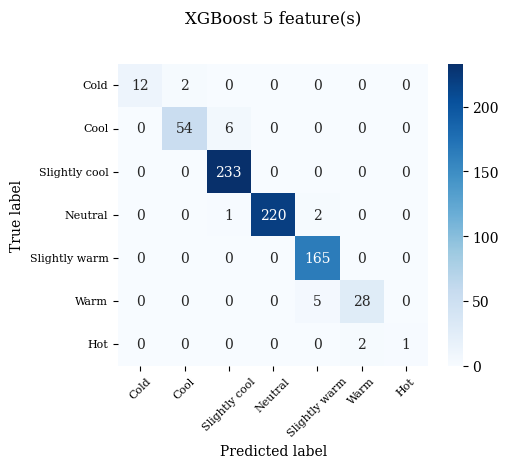

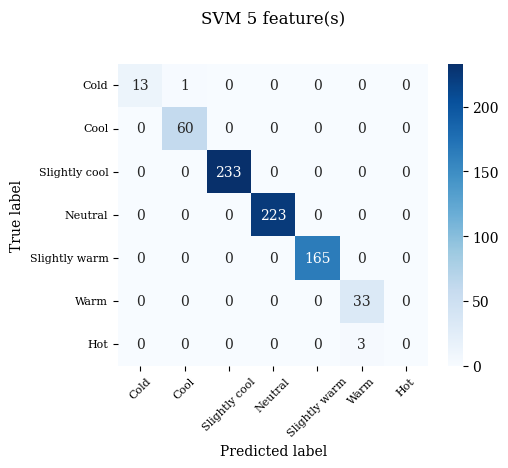

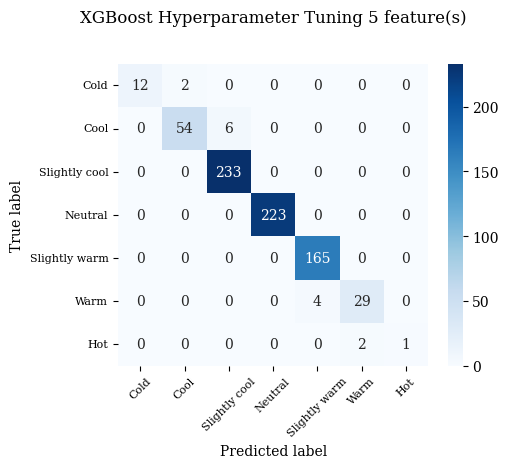

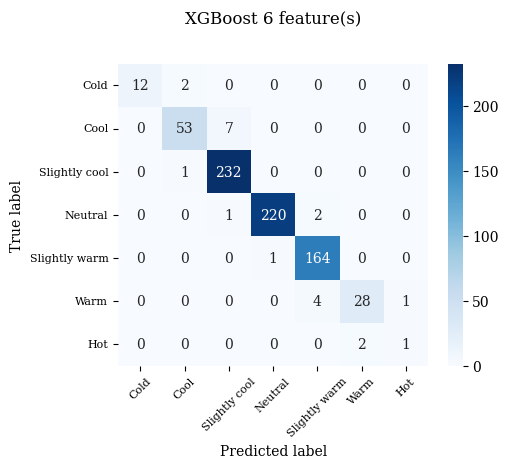

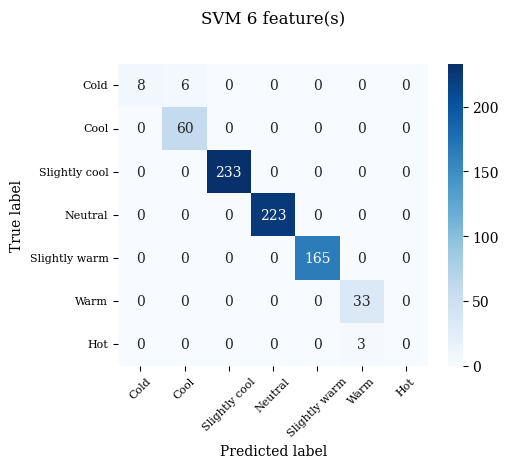

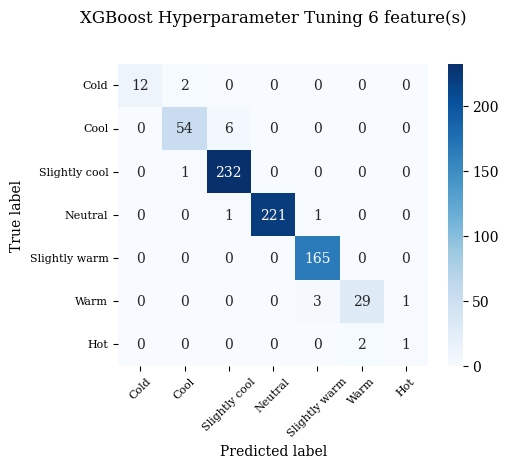

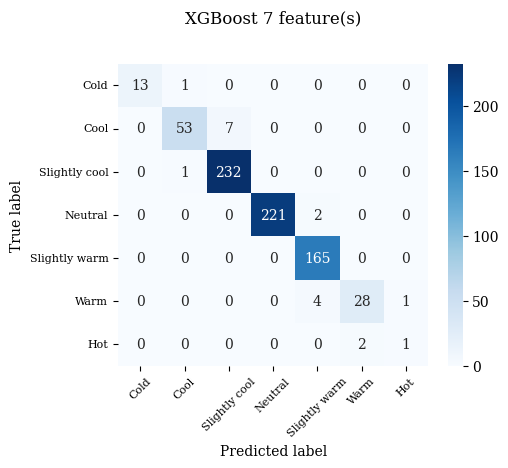

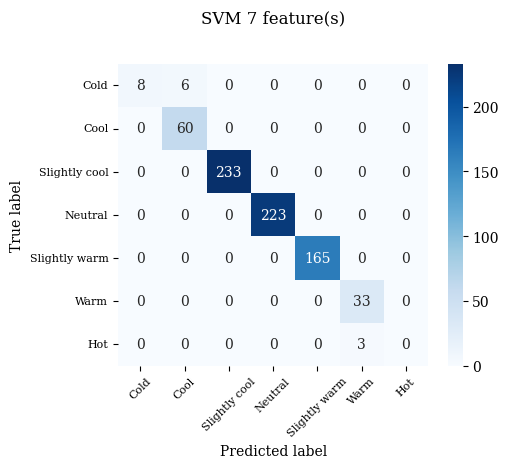

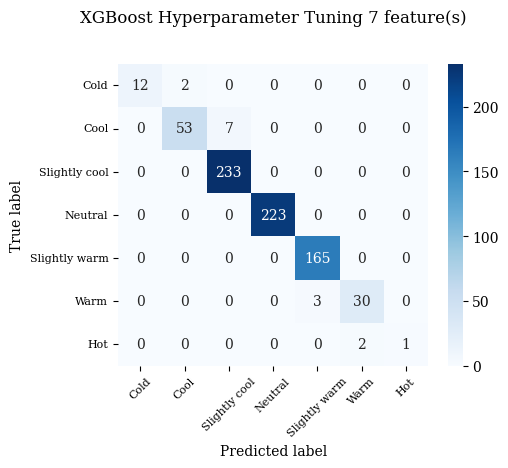

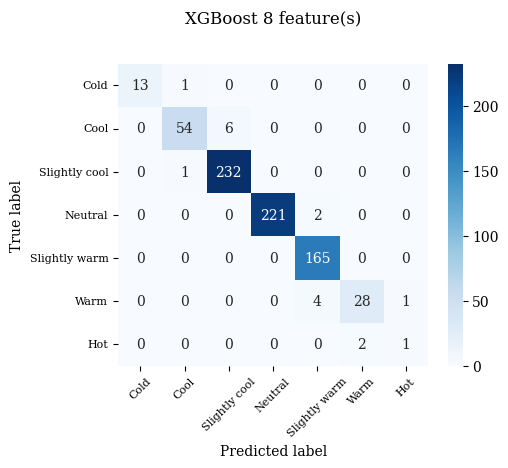

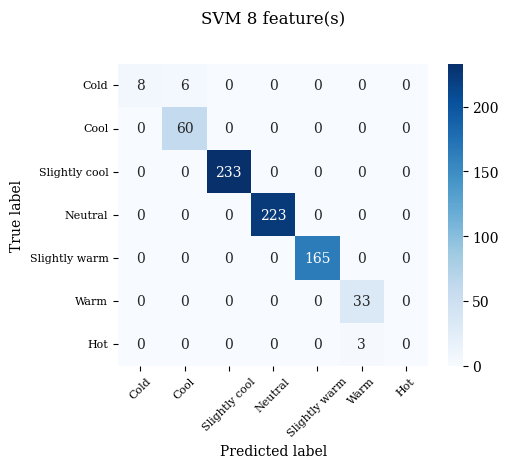

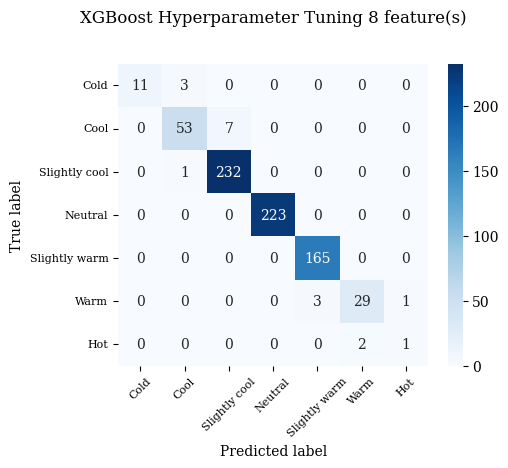

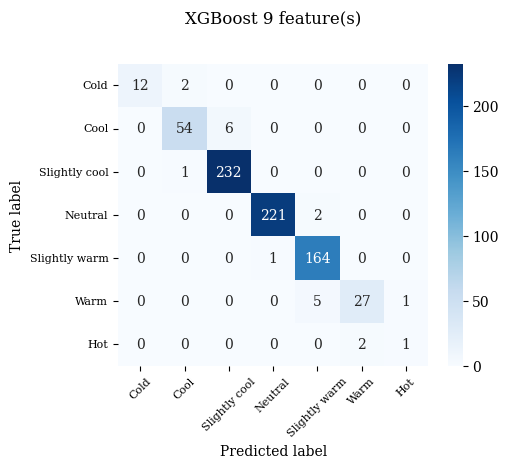

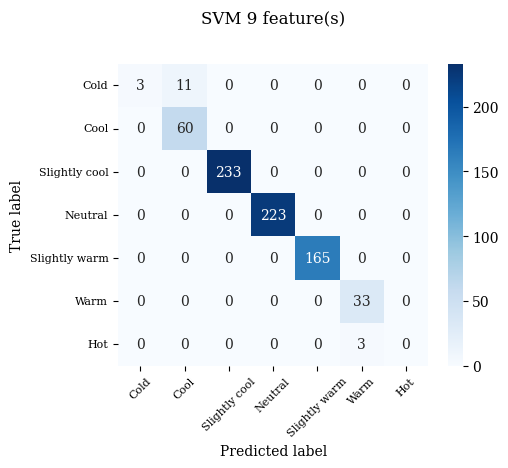

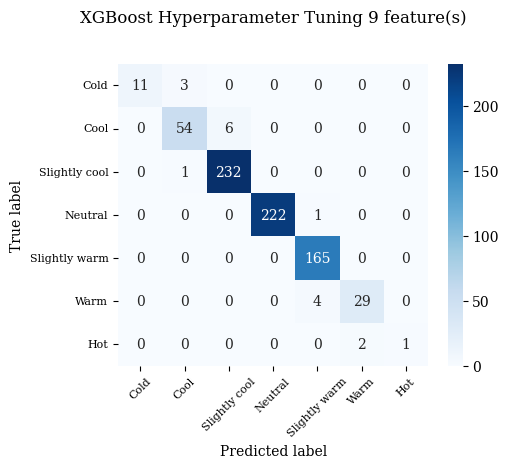

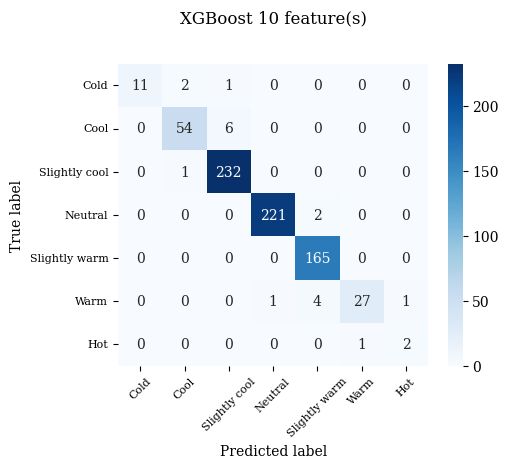

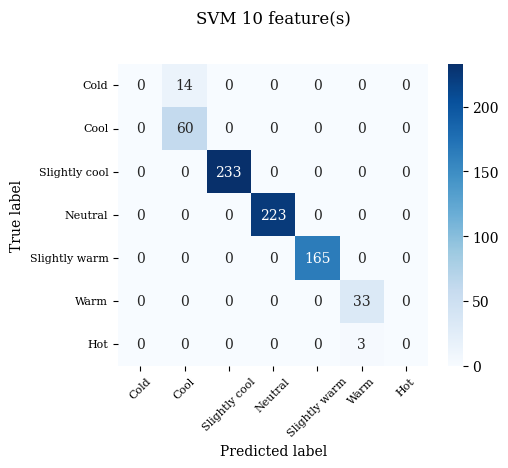

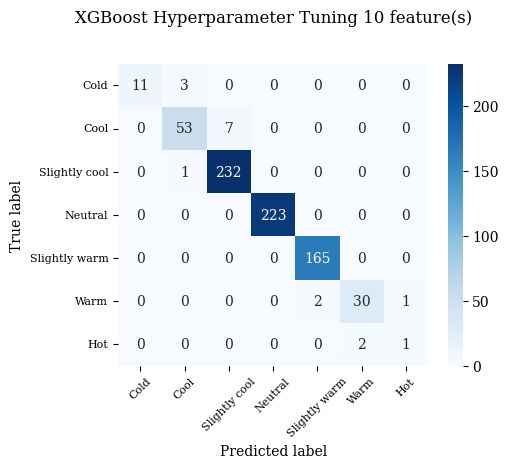

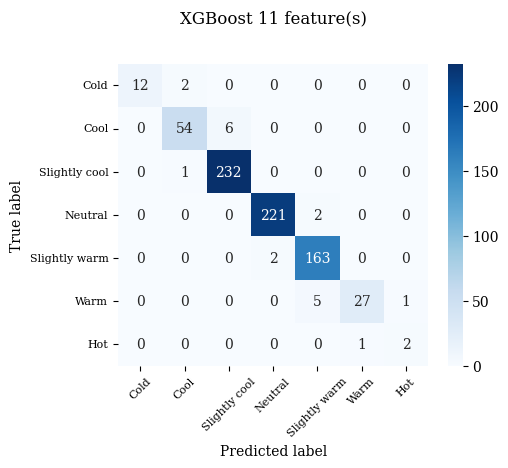

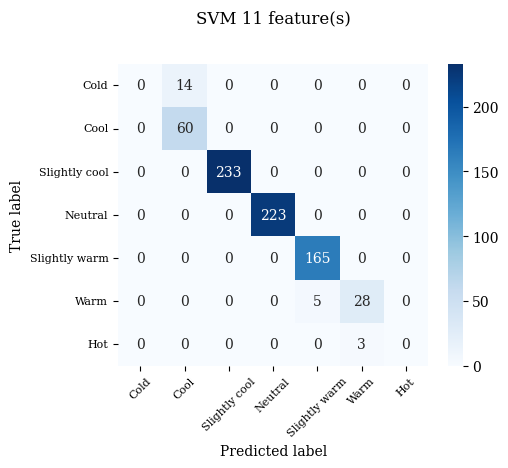

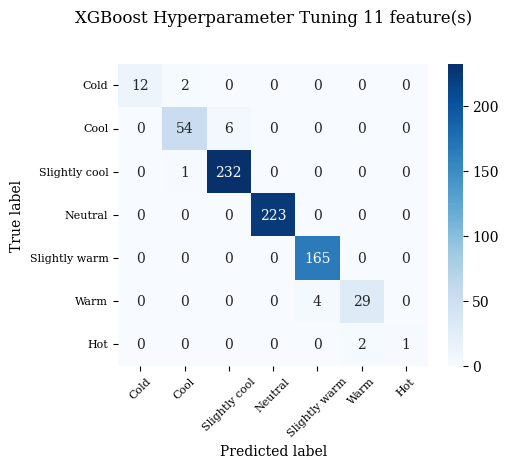

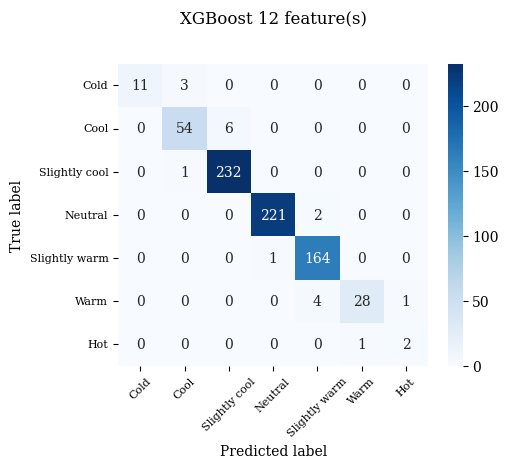

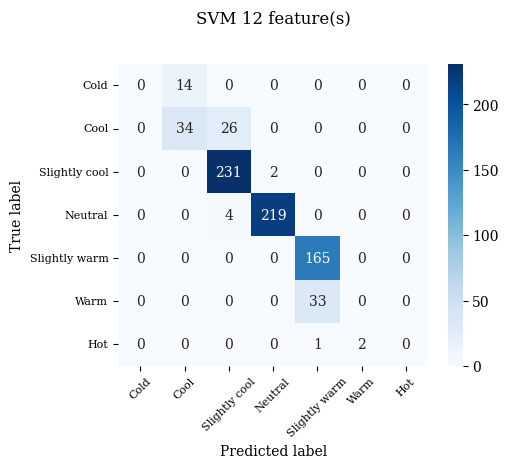

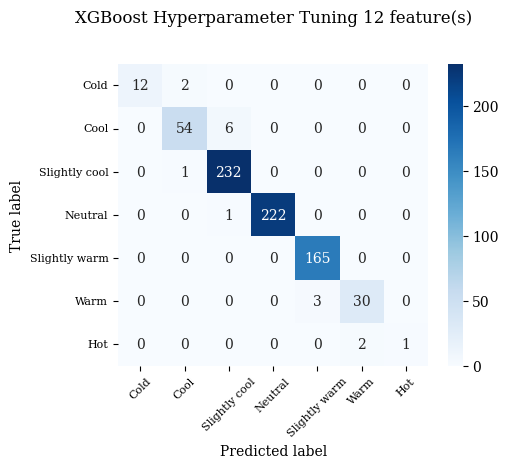

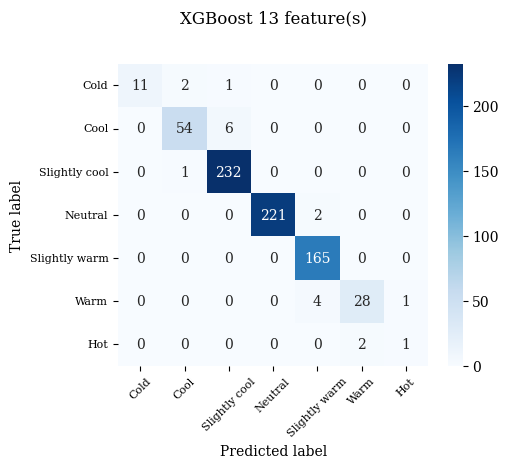

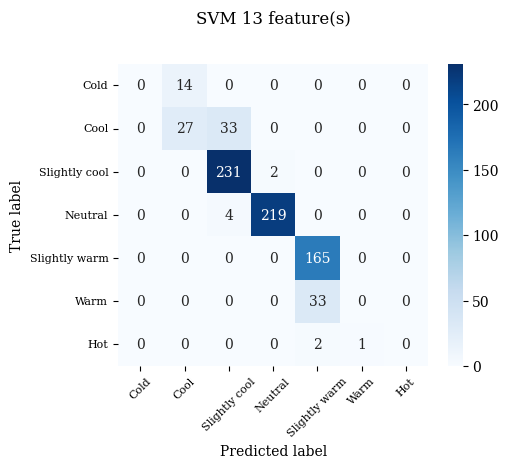

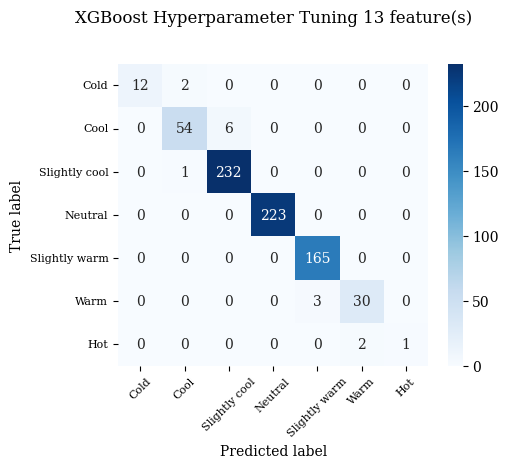

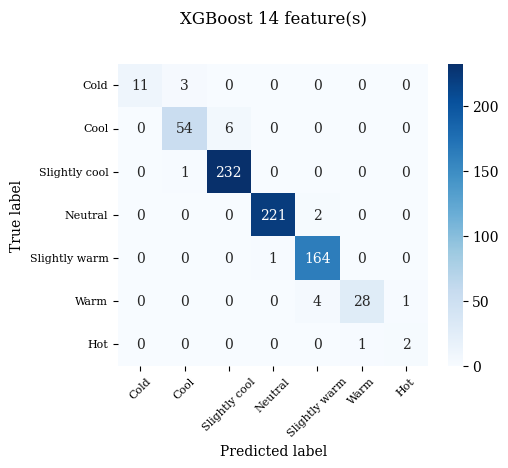

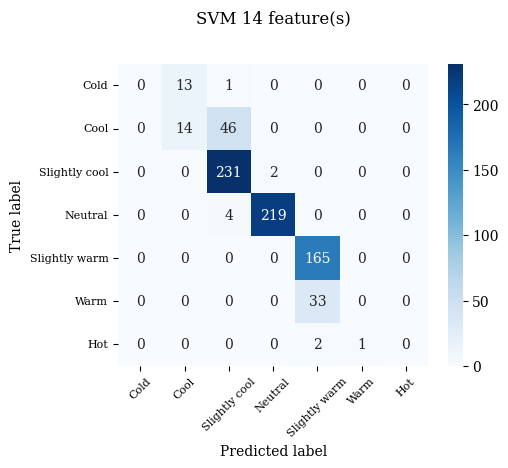

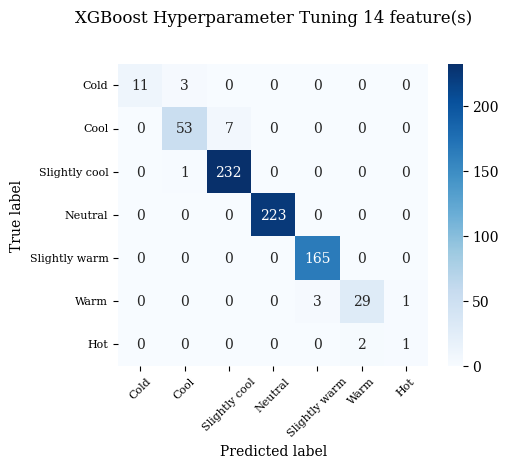

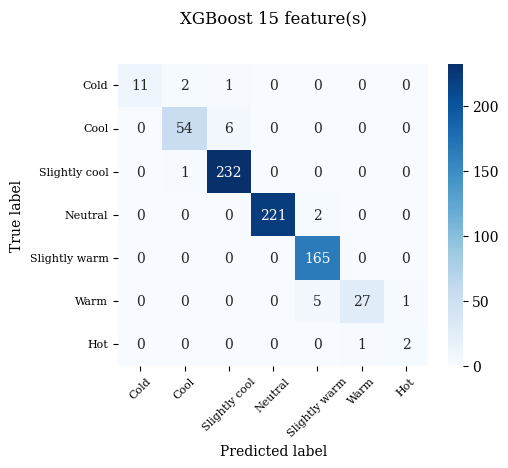

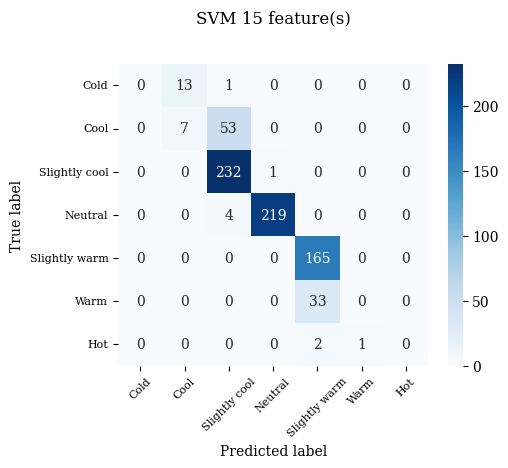

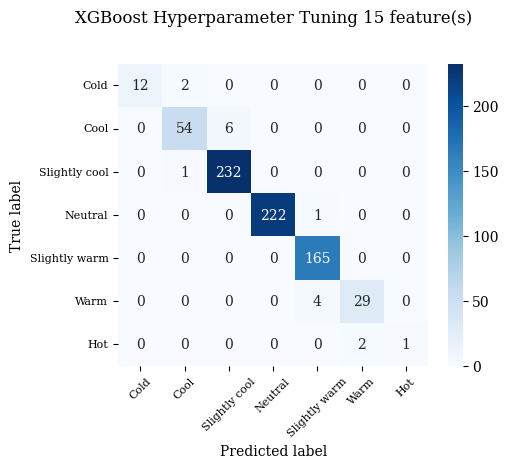

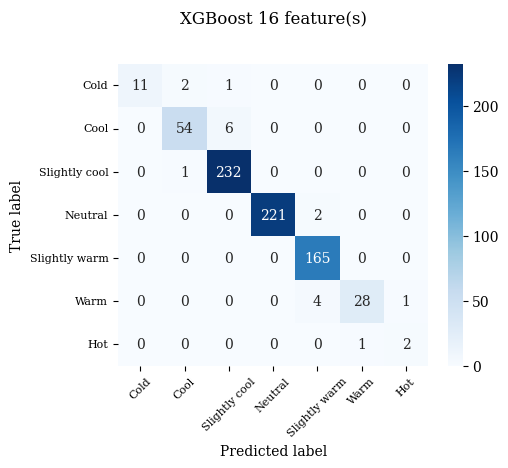

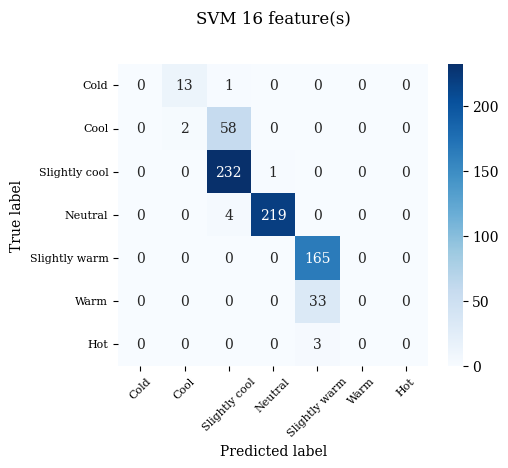

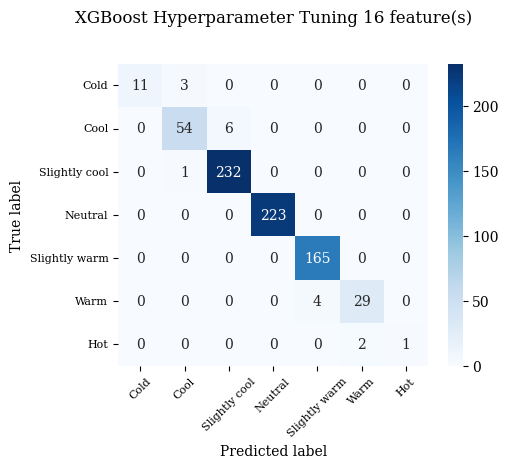

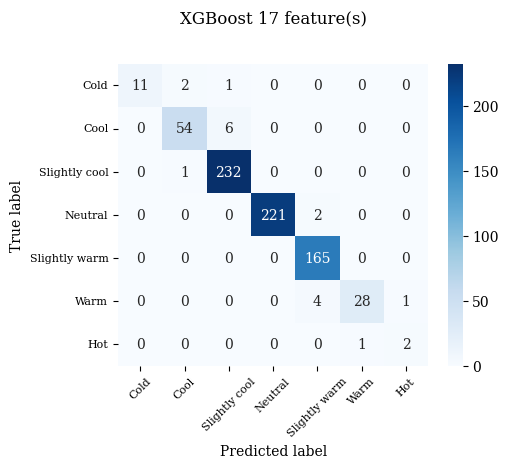

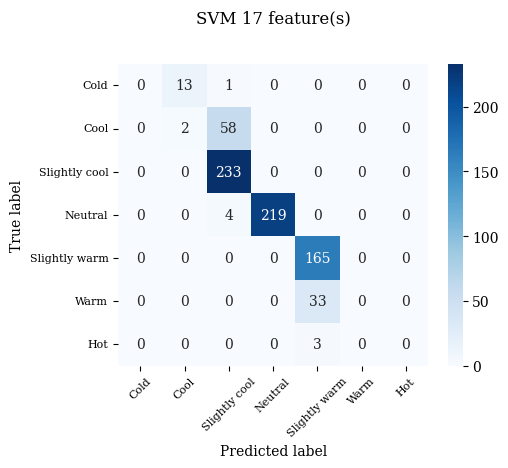

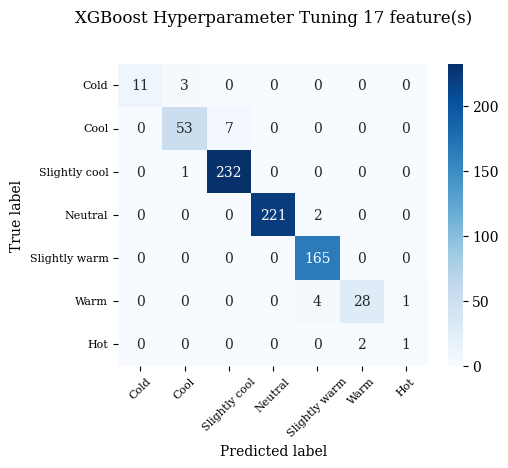

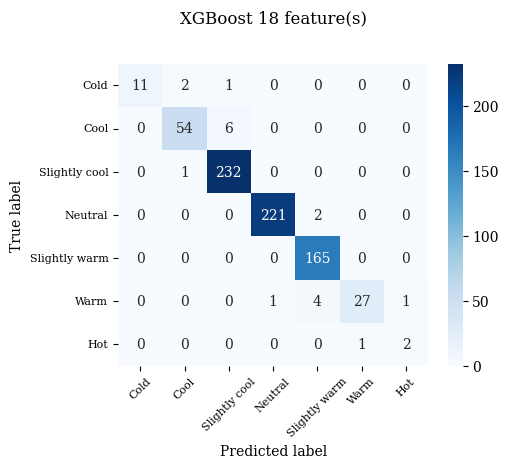

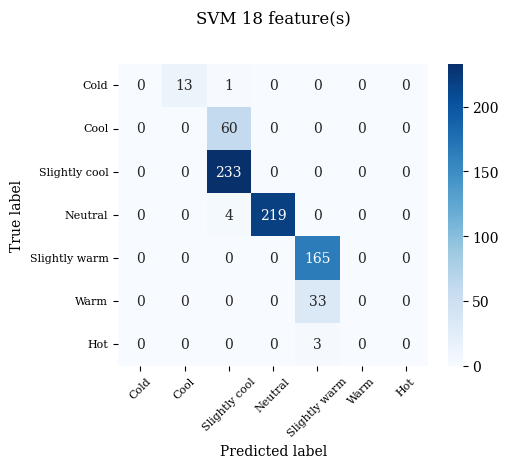

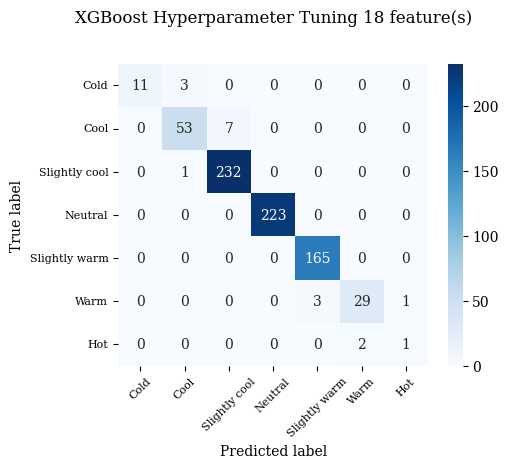

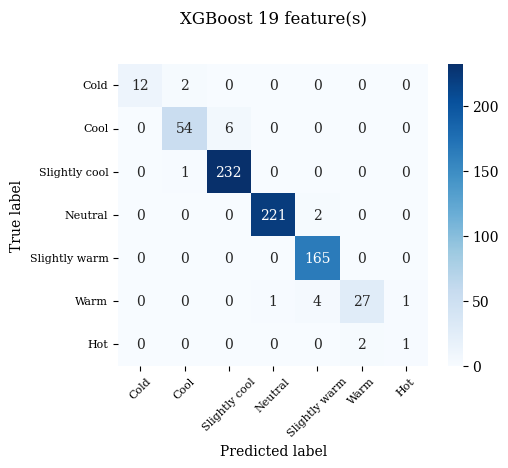

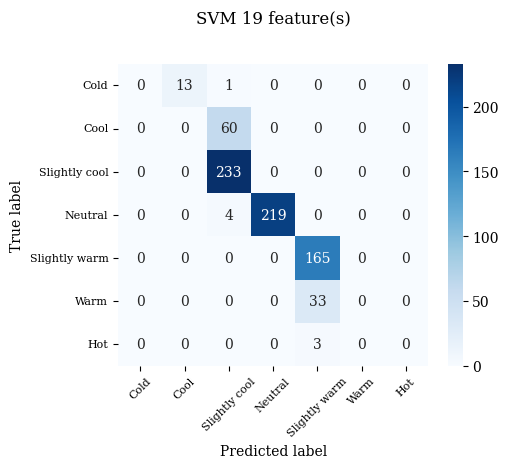

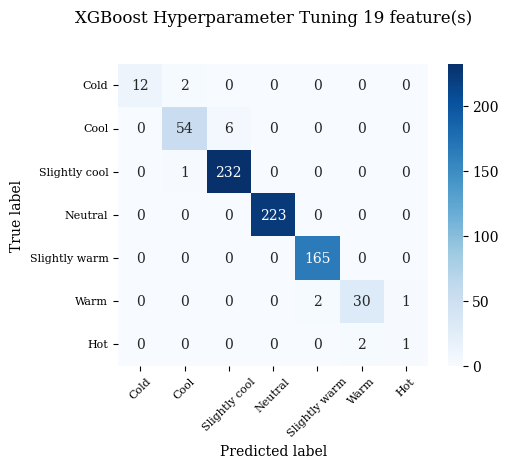

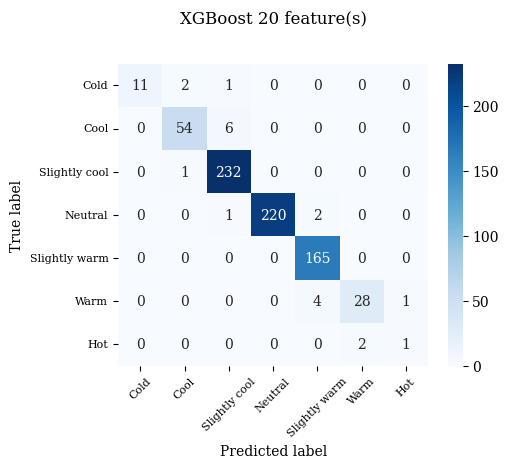

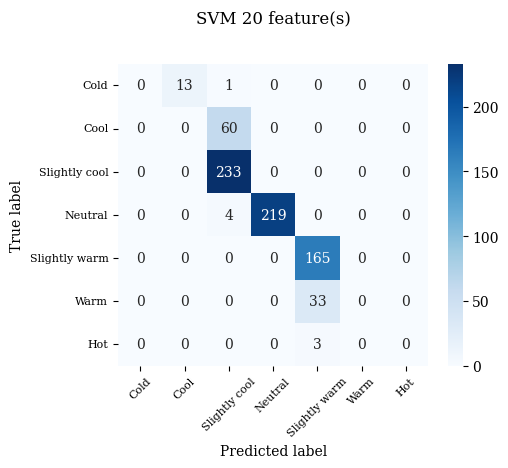

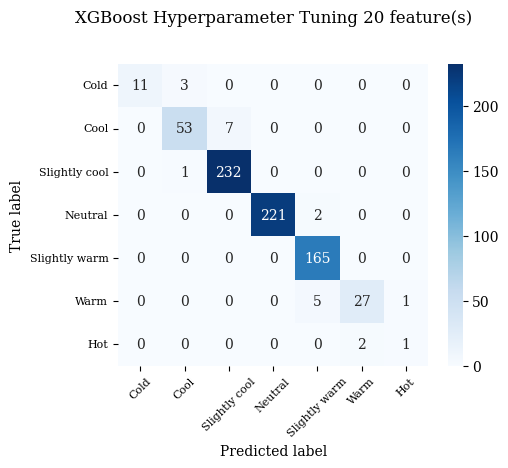

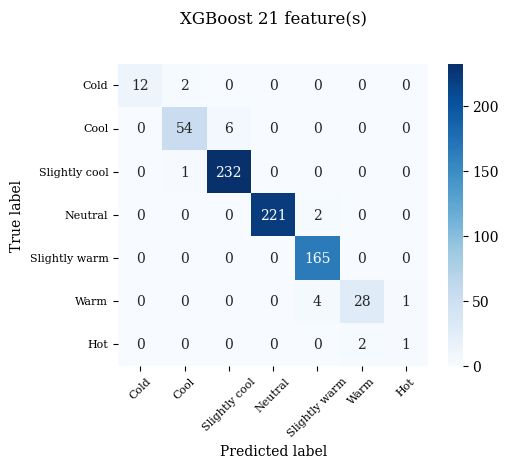

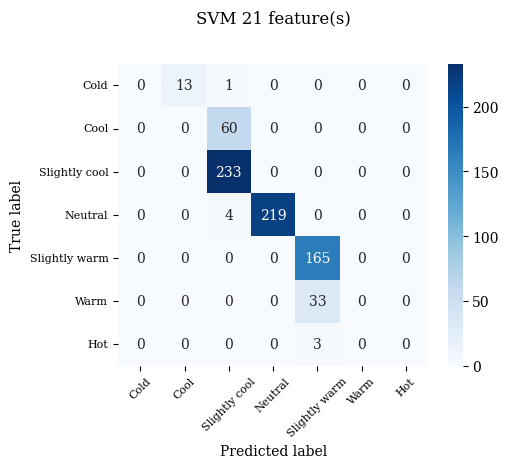

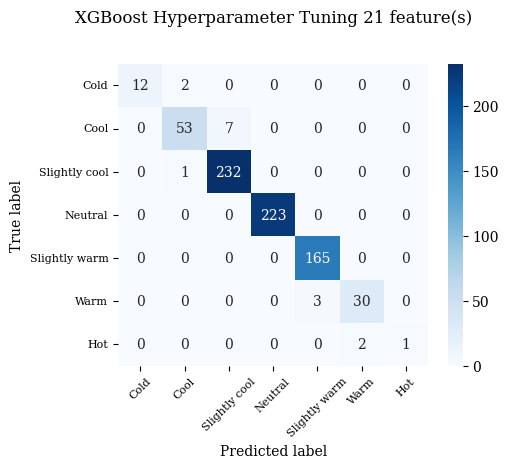

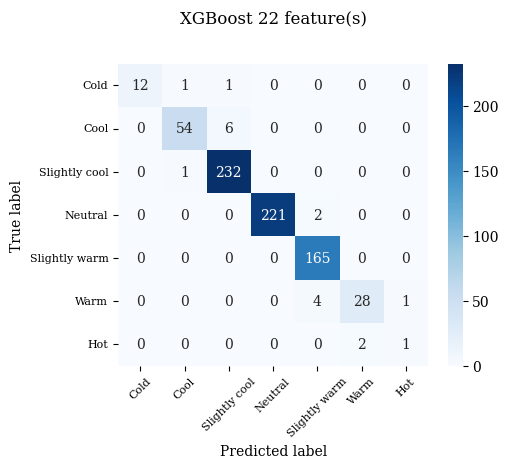

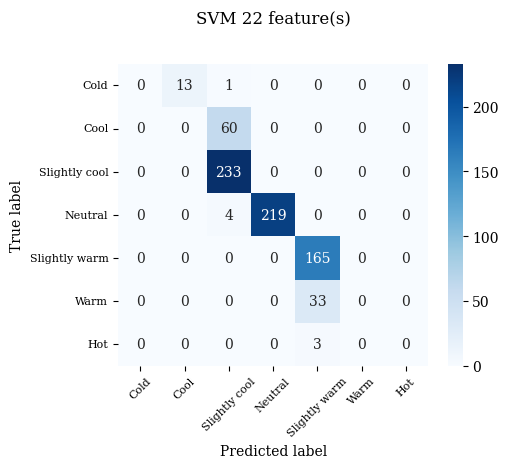

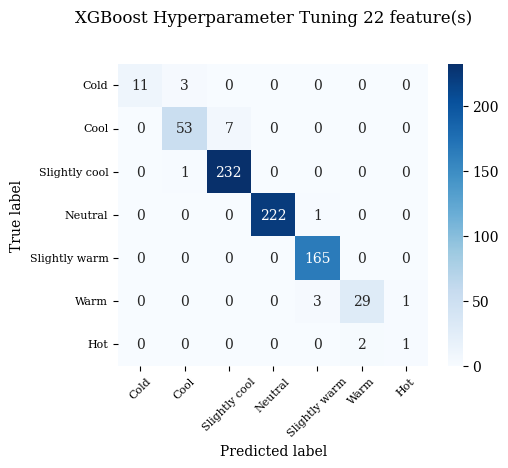

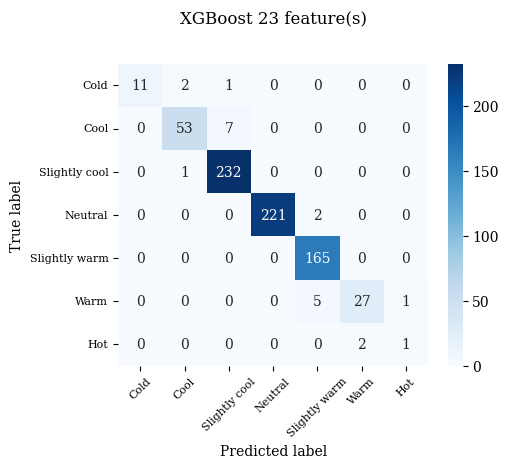

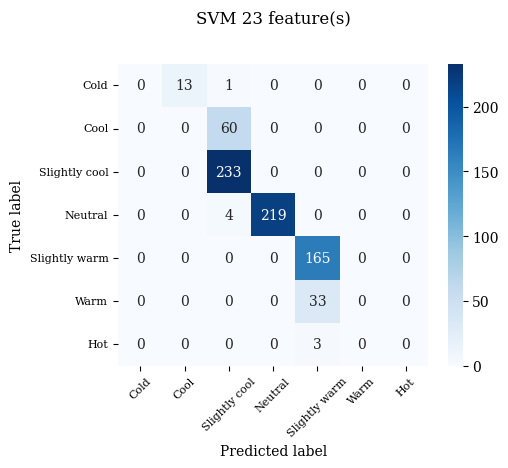

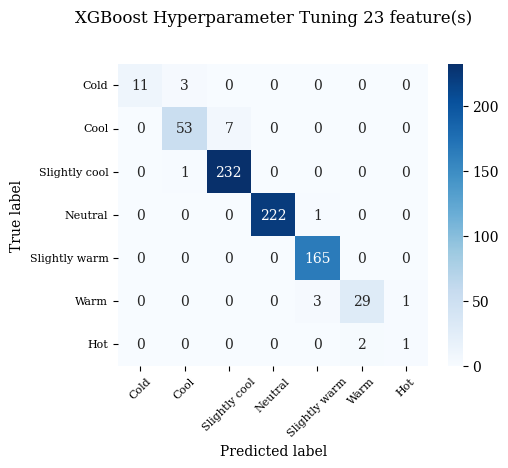

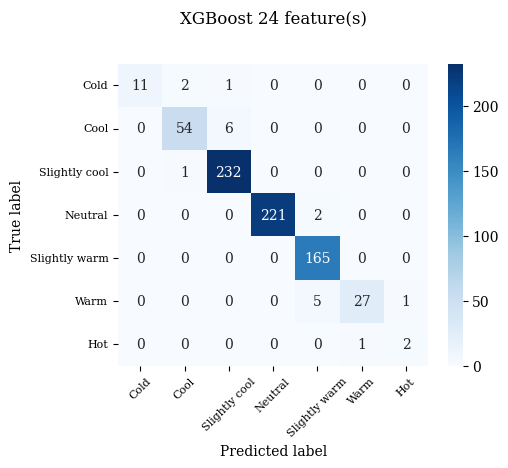

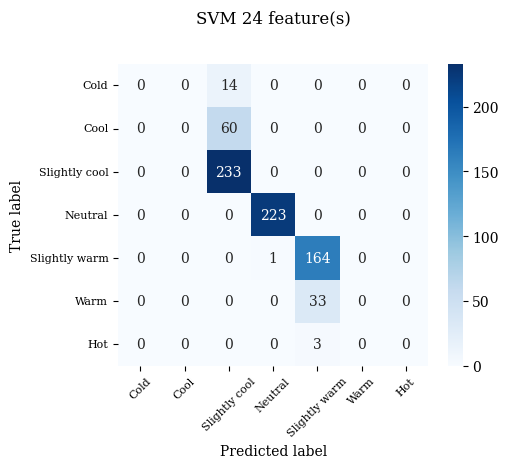

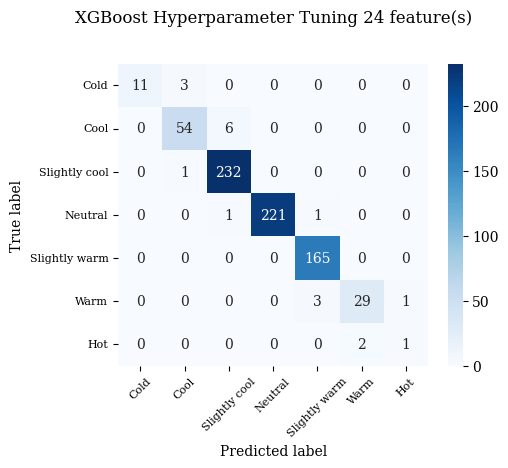

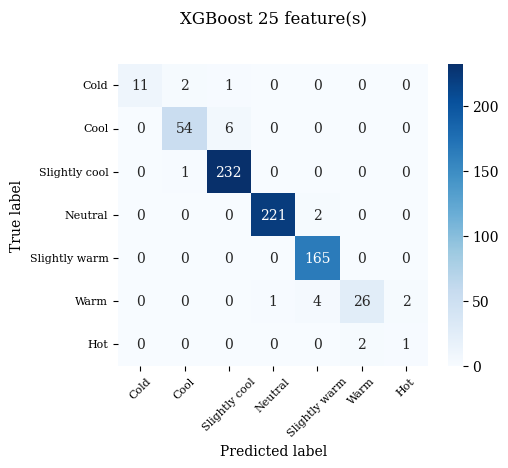

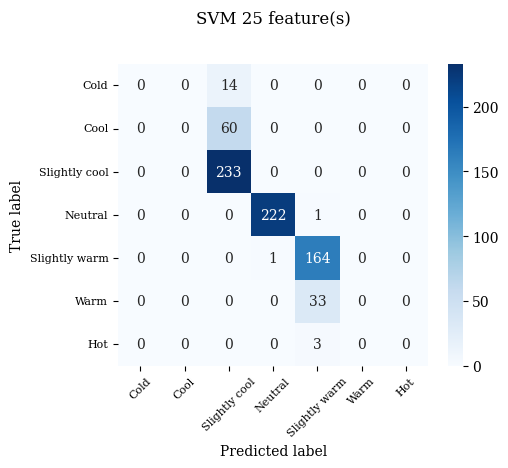

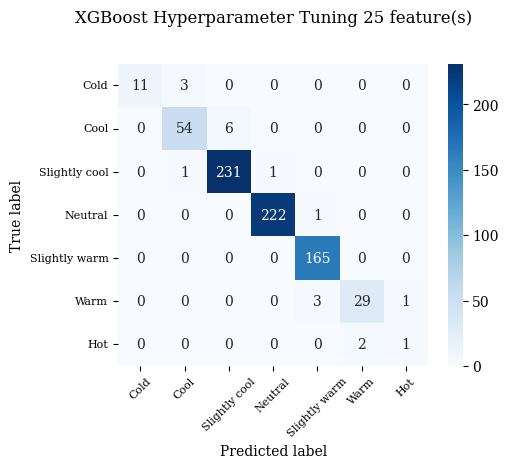

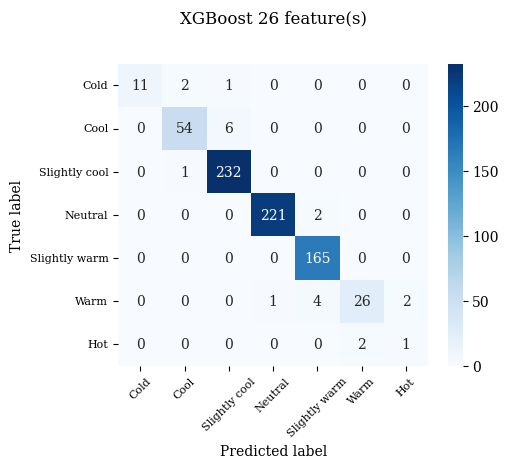

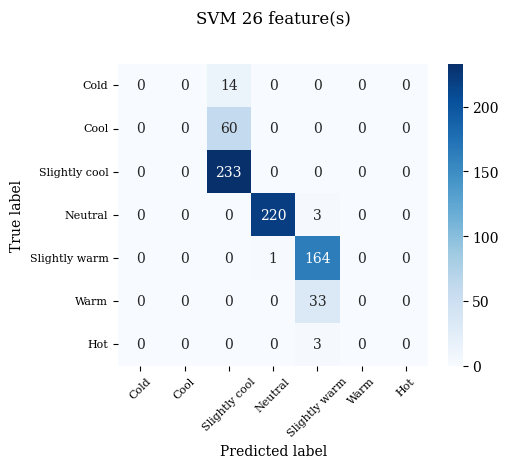

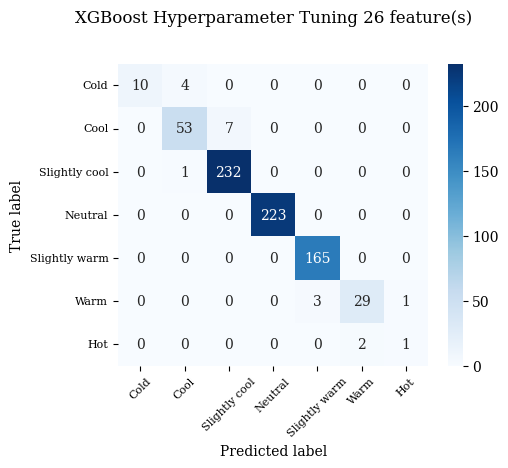

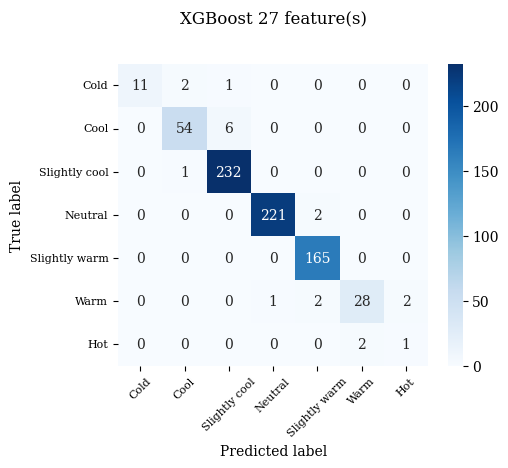

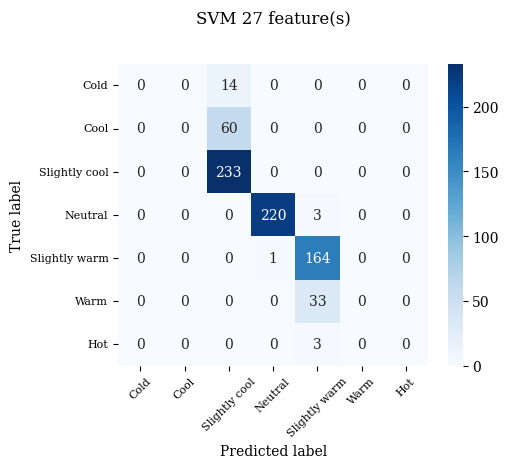

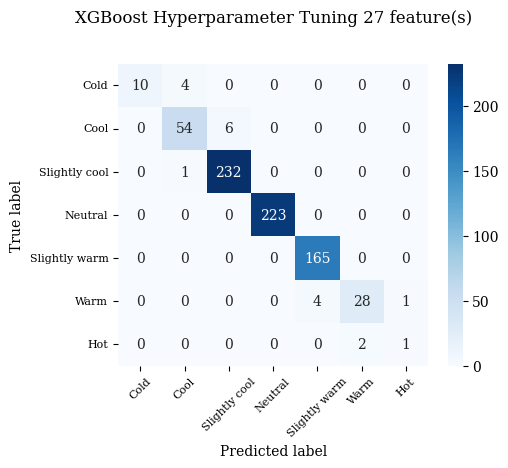

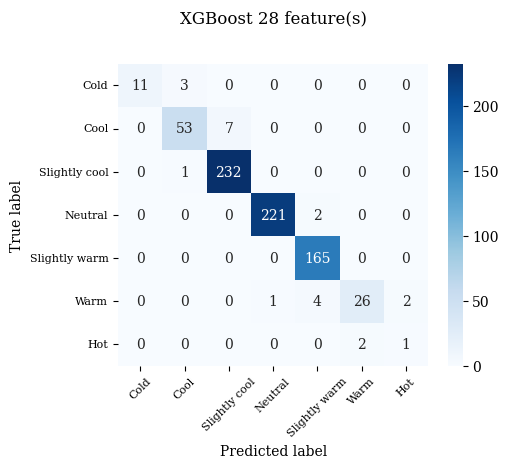

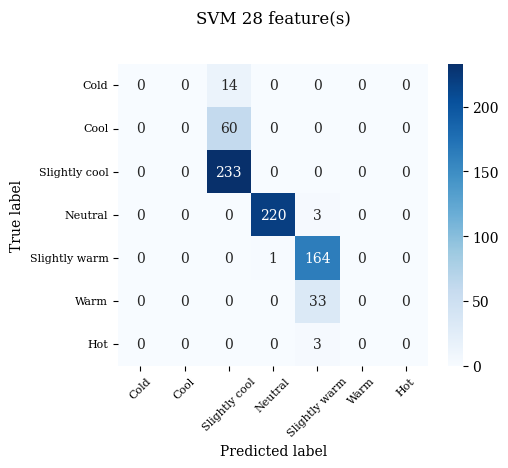

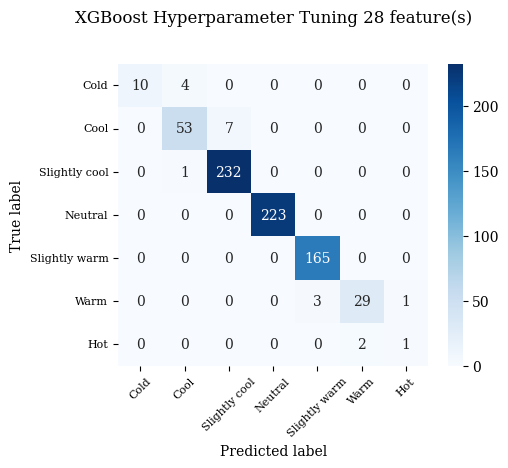

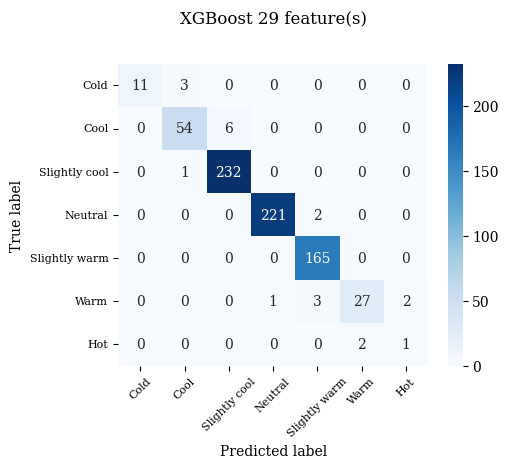

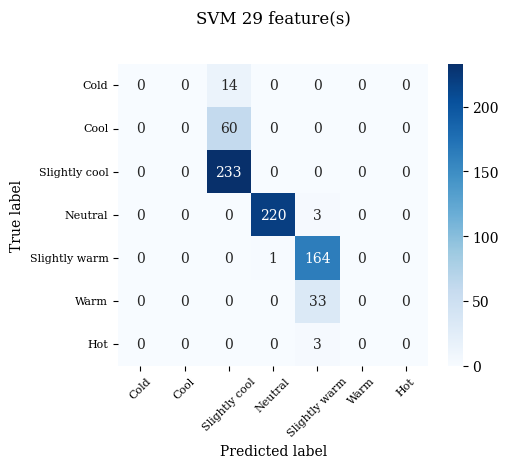

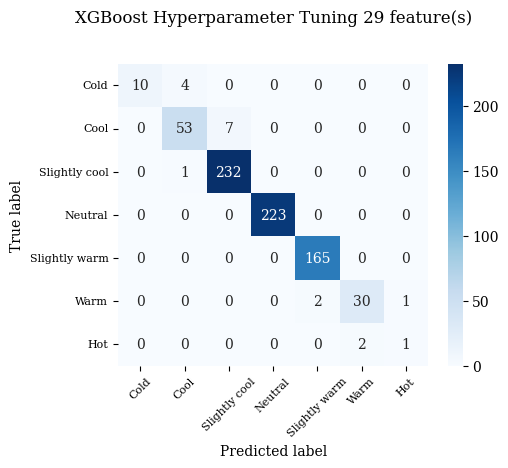

In [140]:
featureNum = []

# XGBoost data
trainAcc_xgb = []
trainSec_xgb = []
testAcc_xgb = []
testSec_xgb = []
MSE_xgb = []
MAE_xgb = []
MAPE_xgb = []

# SVM data
trainAcc_svm = []
trainSec_svm = []
testAcc_svm = []
testSec_svm = []
MSE_svm = []
MAE_svm = []
MAPE_svm = []

# XGBoost with parameter tuning data
trainAcc_xgb_hyp = []
trainSec_xgb_hyp = []
testAcc_xgb_hyp = []
testSec_xgb_hyp = []
MSE_xgb_hyp = []
MAE_xgb_hyp = []
MAPE_xgb_hyp = []


model_xgb = XGBClassifier()
model_svm = SVC()

for i in range(len(importance_features)):
    featureNum.append(i + 1)
#     y = data[['TSV']].values.ravel()
#     x = data[importance_features[0:i + 1]]
    
    full_data_renamed = full_data
    full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

    #Selected data
    y = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
    x = full_data_renamed[importance_features[0:i+1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    # Xgboost
    start_time = time.time()
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb.append(accuracy_score(y_train, y_pred))
    trainSec_xgb.append(time.time() - start_time)
    
    start_time = time.time()
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb.append(accuracy_score(y_test, y_pred))
    testSec_xgb.append(time.time() - start_time)
    
    MSE_xgb.append(mean_squared_error(y_test, y_pred))
    MAE_xgb.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    confusion_rev("XGBoost",y_test, y_pred,str(i + 1))
    print("Confusion Matrix XGBoost dengan jumlah feature : ", i + 1)
    
    # SVM
    start_time = time.time()
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_svm.append(accuracy_score(y_train, y_pred))
    trainSec_svm.append(time.time() - start_time)
    
    start_time = time.time()
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_svm.append(accuracy_score(y_test, y_pred))
    testSec_svm.append(time.time() - start_time)
    
    MSE_svm.append(mean_squared_error(y_test, y_pred))
    MAE_svm.append(mean_absolute_error(y_test, y_pred))
    MAPE_svm.append(mean_absolute_percentage_error(y_test, y_pred))
    confusion_rev("SVM",y_test, y_pred,str(i + 1))
    print("Confusion Matrix SVM dengan jumlah feature : ", i + 1)
    
    # XGBoost with parameter tuning using random seacrh
    clf_hyp_rand_60 = clf_hyp_rand_60.fit(X_train, y_train)
    
    full_param = clf_hyp_rand_60.best_params_
    model_full_param = XGBClassifier(
        colsample_bytree = full_param['colsample_bytree'], 
        colsample_bylevel = full_param["colsample_bylevel"],
        learning_rate = full_param["learning_rate"],
        max_depth = full_param["max_depth"],
        n_estimators = full_param["n_estimators"],
        num_class = full_param["num_class"],
        subsample = full_param["subsample"]
    )
    
    start_time = time.time()
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb_hyp.append(accuracy_score(y_train, y_pred))
    trainSec_xgb_hyp.append(time.time() - start_time)
    
    start_time = time.time()
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb_hyp.append(accuracy_score(y_test, y_pred))
    testSec_xgb_hyp.append(time.time() - start_time)
    
    MSE_xgb_hyp.append(mean_squared_error(y_test, y_pred))
    MAE_xgb_hyp.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb_hyp.append(mean_absolute_percentage_error(y_test, y_pred))
    confusion_rev("XGBoost Hyperparameter Tuning",y_test, y_pred,str(i + 1))
    print("Confusion Matrix XGBoost hyperparam dengan jumlah feature : ", i + 1)

In [141]:
data_comp1 = {'featureNum': featureNum,
             'trainAcc_xgb': trainAcc_xgb,
              "trainSec_xgb" : trainSec_xgb,
             "testAcc_xgb" : testAcc_xgb,
              "testSec_xgb" : testSec_xgb,
             "MSE_xgb" : MSE_xgb,
             "MAE_xgb" : MAE_xgb,
             "MAPE_xgb" : MAPE_xgb,
             "trainAcc_svm" : trainAcc_svm,
              "trainSec_svm" : trainSec_svm,
             "testAcc_svm" : testAcc_svm,
              "testSec_svm": testSec_svm,
             "MSE_svm" : MSE_svm,
             "MAE_svm" : MAE_svm,
             "MAPE_svm" : MAPE_svm,
             "trainAcc_xgb_hyp" : trainAcc_xgb_hyp,
              "trainSec_xgb_hyp": trainSec_xgb_hyp,
             "testAcc_xgb_hyp" : testAcc_xgb_hyp,
              "testSec_xgb_hyp": testSec_xgb_hyp,
             "MSE_xgb_hyp" : MSE_xgb_hyp,
             "MAE_xgb_hyp" : MAE_xgb_hyp,
             "MAPE_xgb_hyp" : MAPE_xgb_hyp
            } 
comp_table1 = pd.DataFrame.from_dict(data_comp1)
comp_table1

featureNum  trainAcc_xgb  trainSec_xgb  testAcc_xgb  testSec_xgb  \
0            1      0.527305      0.379354     0.500684     0.263241   
1            2      0.790370      1.996787     0.533516     0.794723   
2            3      1.000000      1.523991     0.965800     0.593561   
3            4      1.000000      0.822769     0.964432     0.600564   
4            5      1.000000      0.818767     0.975376     0.676632   
5            6      1.000000      0.807759     0.971272     0.796748   
6            7      1.000000      1.293215     0.975376     0.879823   
7            8      1.000000      1.150078     0.976744     1.254696   
8            9      1.000000      0.970910     0.972640     0.914860   
9           10      1.000000      1.114044     0.974008     1.095029   
10          11      1.000000      1.109032     0.972640     0.966909   
11          12      1.000000      1.237154     0.974008     1.130061   
12          13      1.000000      1.213136     0.974008     1.094023   
13          14      1.000000      1.191118     0.974008     1.112041   
14          15      1.000000      1.165096     0.974008     1.108034   
15          16      1.000000      1.250166     0.975376     1.149078   
16          17      1.000000      1.437346     0.975376     1.160083   
17          18      1.000000      1.262185     0.974008     1.277198   
18          19      1.000000      1.291209     0.974008     1.205129   
19          20      1.000000      1.579479     0.972640     1.269192   
20          21      1.000000      1.392302     0.975376     1.242164   
21          22      1.000000      1.307223     0.975376     1.255176   
22          23      1.000000      1.336256     0.971272     1.368278   
23          24      1.000000      1.430336     0.974008     1.337253   
24          25      1.000000      1.468374     0.971272     1.386296   
25          26      1.000000      1.512413     0.971272     1.458369   
26          27      1.000000      1.559462     0.974008     1.481384   
27          28      1.000000      1.576472     0.969904     1.488394   
28          29      1.000000      1.601504     0.972640     1.508416   

     MSE_xgb   MAE_xgb      MAPE_xgb  trainAcc_svm  trainSec_svm  ...  \
0   1.101231  0.671683  1.909871e+14      0.527305      0.630588  ...   
1   1.175103  0.660739  1.909871e+14      0.459777      1.131195  ...   
2   0.034200  0.034200  1.848263e+13      0.967704      0.902145  ...   
3   0.035568  0.035568  1.848263e+13      0.970053      0.468177  ...   
4   0.024624  0.024624  1.232175e+13      0.989430      0.283268  ...   
5   0.028728  0.028728  1.232175e+13      0.987082      0.324246  ...   
6   0.024624  0.024624  6.160875e+12      0.987082      0.399870  ...   
7   0.023256  0.023256  6.160875e+12      0.987082      0.301264  ...   
8   0.027360  0.027360  1.232175e+13      0.979448      0.476445  ...   
9   0.034200  0.028728  2.464350e+13      0.972989      0.397836  ...   
10  0.027360  0.027360  1.232175e+13      0.968291      0.408381  ...   
11  0.025992  0.025992  1.848263e+13      0.907810      0.693706  ...   
12  0.030096  0.027360  2.464350e+13      0.896653      0.673634  ...   
13  0.025992  0.025992  1.848263e+13      0.876101      0.658081  ...   
14  0.030096  0.027360  2.464350e+13      0.872578      0.676623  ...   
15  0.028728  0.025992  2.464350e+13      0.867880      0.729683  ...   
16  0.028728  0.025992  2.464350e+13      0.867880      0.753505  ...   
17  0.034200  0.028728  2.464350e+13      0.866706      0.671630  ...   
18  0.030096  0.027360  1.232175e+13      0.867293      0.678638  ...   
19  0.031464  0.028728  2.464350e+13      0.865531      0.731689  ...   
20  0.024624  0.024624  1.232175e+13      0.864944      0.788745  ...   
21  0.028728  0.025992  1.848263e+13      0.864944      0.717671  ...   
22  0.032832  0.030096  2.464350e+13      0.865531      0.693654  ...   
23  0.030096  0.027360  2.464350e+13      0.866706      0.784730  ...   
24  0.036936  0.03

In [142]:
comp_table1.to_csv('compare_hyp_rand_60_1per1_30nov.csv')

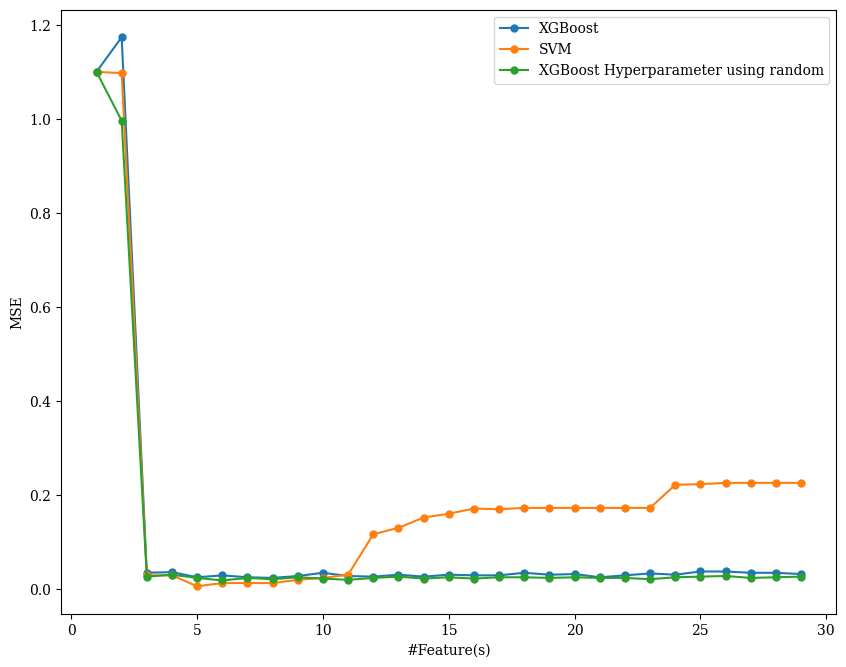

In [143]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

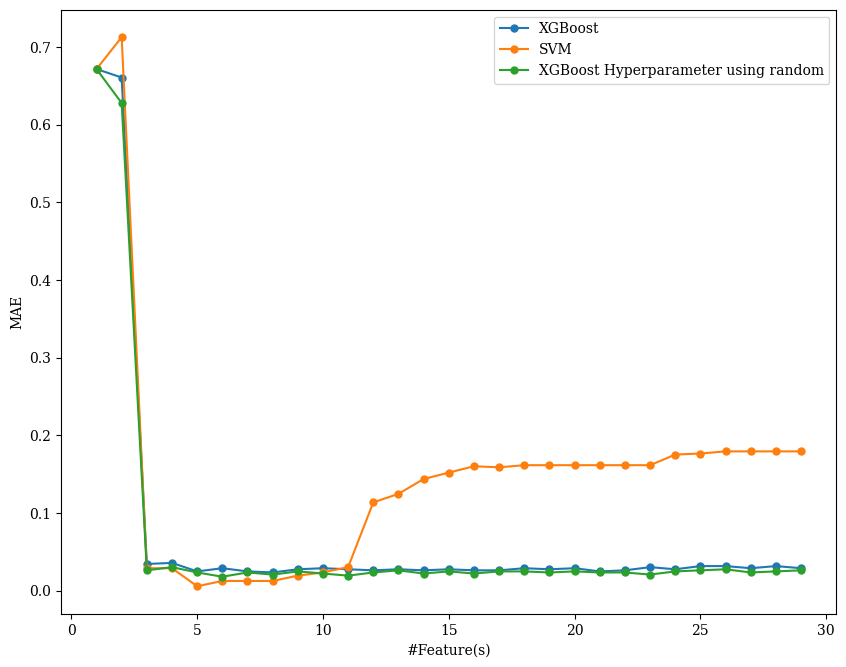

In [144]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["MAE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MAE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MAE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()

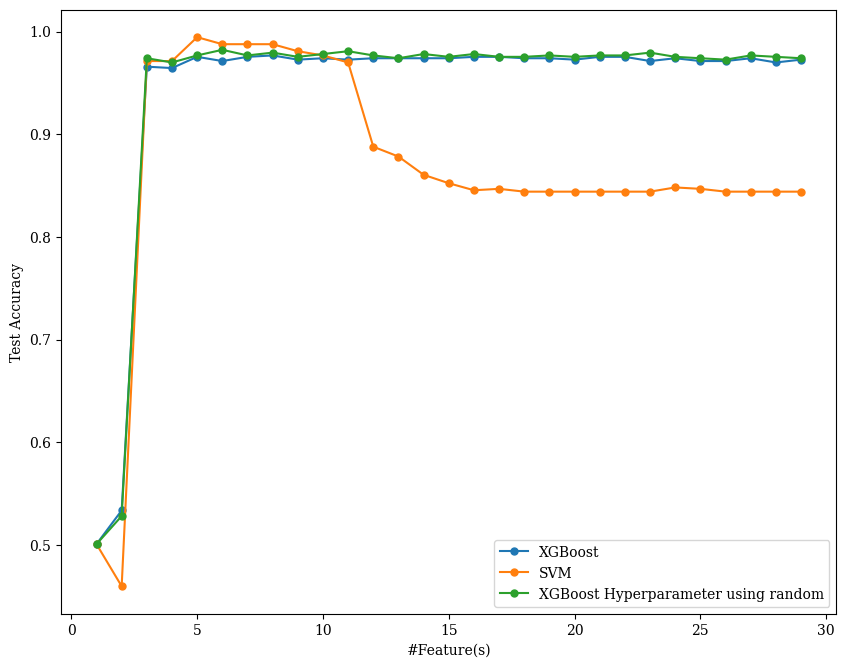

In [145]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["testAcc_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["testAcc_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["testAcc_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

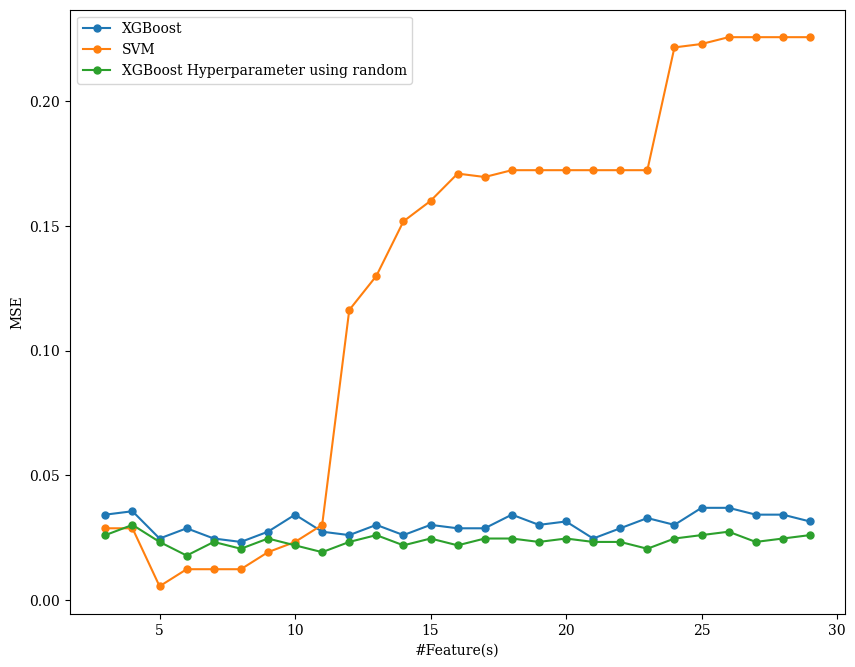

In [146]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][2:29], comp_table["MSE_xgb"][2:29], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MSE_svm"][2:29], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MSE_xgb_hyp"][2:29], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

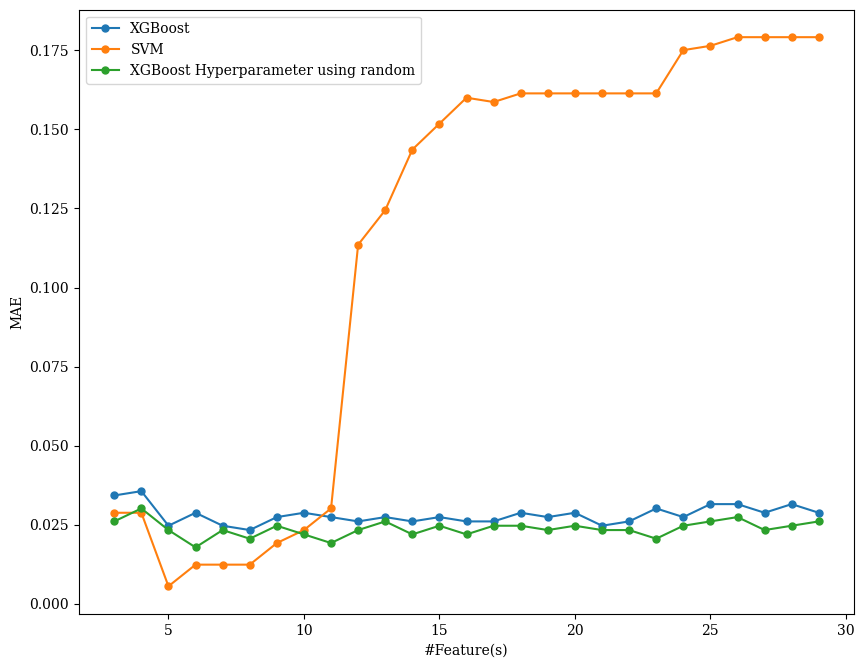

In [147]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][2:29], comp_table["MAE_xgb"][2:29], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MAE_svm"][2:29], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["MAE_xgb_hyp"][2:29], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()

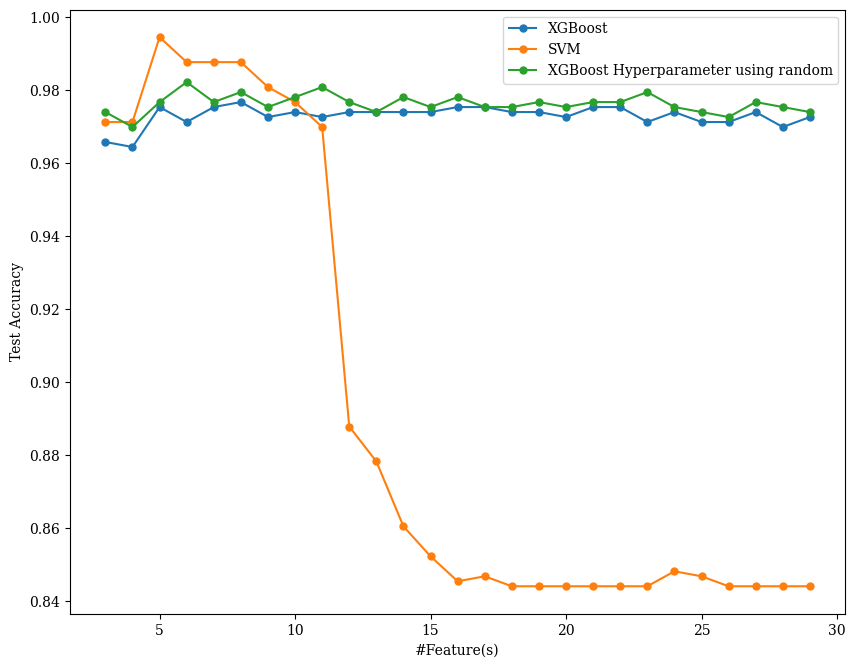

In [148]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][2:29], comp_table["testAcc_xgb"][2:29], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["testAcc_svm"][2:29], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][2:29], comp_table["testAcc_xgb_hyp"][2:29], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

# XGBoost with Hyperparameter Tuning using Gridsearch

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
model_hyp_grids = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [41]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [46]:
grid_search = GridSearchCV(
    estimator=model_hyp_grids,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

## XGBoost Full_data with hyperparameter tuning using Gridsearch

In [47]:
clf_full_hyp_grids = grid_search.fit(X_main_train, y_main_train)
clf_full_hyp_grids

Fitting 10 folds for each of 96 candidates, totalling 960 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [63]:
hyp_grids_full_param = clf_full_hyp_grids.best_params_
hyp_grids_full_param["n_estimators"]
# for i in range(len(hyp_grids_full_param)):
#     print(type(hyp_grids_full_param[i+1]))

60

In [64]:
hyp_grids_full_param = clf_full_hyp_grids.best_params_
model_hyp_grids_full_param = XGBClassifier(
    learning_rate = hyp_grids_full_param["learning_rate"],
    max_depth = hyp_grids_full_param["max_depth"],
    n_estimators = hyp_grids_full_param["n_estimators"]
)

In [65]:
clf_full_param, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_hyp_grids_full_param)

Training model 
  Training time : 1.9704182147979736 seconds
  Training accuracy : 0.9418672930123312

Testing model 
  Testing time : 0.5935482978820801 seconds
  Testing accuracy : 0.8878248974008208

  MSE   : 0.3528271589659265
  MAE   : 0.11627906976744186
  MAPE  : 73930500038913.8

Report :
              precision    recall  f1-score   support

         0.0       0.57      0.29      0.38        14
         1.0       0.84      0.70      0.76        60
         2.0       0.89      0.97      0.93       233
         3.0       0.92      0.92      0.92       223
         4.0       0.87      0.92      0.89       165
         5.0       0.90      0.55      0.68        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.89       731
   macro avg       0.78      0.67      0.71       731
weighted avg       0.88      0.89      0.88       731



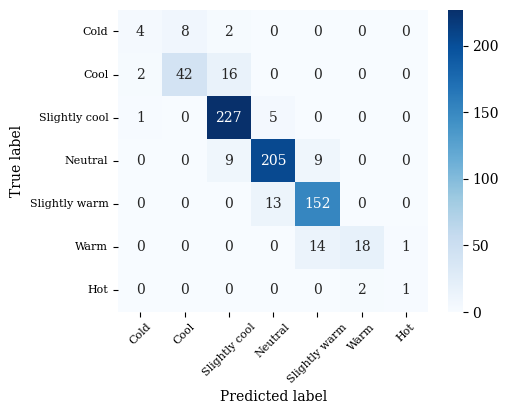

In [66]:
confusion(y_full_test, y_full_pred)

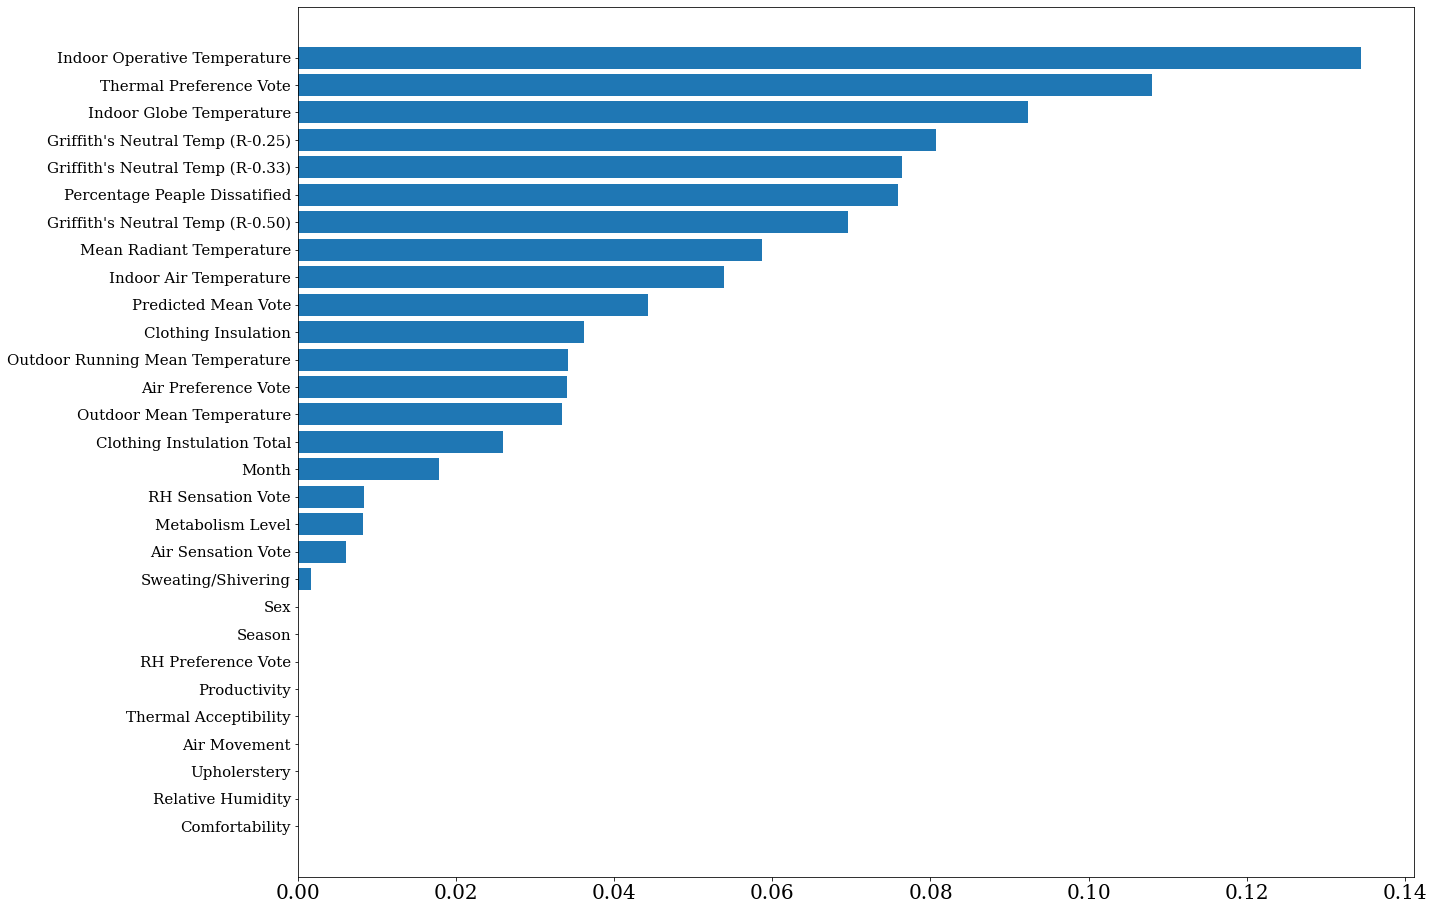

In [67]:
importance_full_hyp_grids = importance(clf_full_param, X_full)

# Ternyata hasilnya lebih buruk dibandingkan hyperparameter tuning using random search

In [47]:
dataaa = "rev_compare_hyp_rand_60_1per1_30nov.csv"
dataaa = pd.read_csv(dataaa)
dataaa[:30]

Unnamed: 0  featureNum trainAcc_xgb  trainSec_xgb  testAcc_xgb  \
0          0.0         1.0  0.527304756      0.379354     0.500684   
1          1.0         2.0  0.790369935      1.996787     0.533516   
2          2.0         3.0            1      1.523991     0.965800   
3          3.0         4.0            1      0.822769     0.964432   
4          4.0         5.0            1      0.818767     0.975376   
5          5.0         6.0            1      0.807759     0.971272   
6          6.0         7.0            1      1.293215     0.975376   
7          7.0         8.0            1      1.150078     0.976744   
8          8.0         9.0            1      0.970910     0.972640   
9          9.0        10.0            1      1.114044     0.974008   
10        10.0        11.0            1      1.109032     0.972640   
11        11.0        12.0            1      1.237154     0.974008   
12        12.0        13.0            1      1.213136     0.974008   
13        13.0        14.0            1      1.191118     0.974008   
14        14.0        15.0            1      1.165096     0.974008   
15        15.0        16.0            1      1.250166     0.975376   
16        16.0        17.0            1      1.437346     0.975376   
17        17.0        18.0            1      1.262185     0.974008   
18        18.0        19.0            1      1.291209     0.974008   
19        19.0        20.0            1      1.579479     0.972640   
20        20.0        21.0            1      1.392302     0.975376   
21        21.0        22.0            1      1.307223     0.975376   
22        22.0        23.0            1      1.336256     0.971272   
23        23.0        24.0            1      1.430336     0.974008   
24        24.0        25.0            1      1.468374     0.971272   
25        25.0        26.0            1      1.512413     0.971272   
26        26.0        27.0            1      1.559462     0.974008   
27        27.0        28.0            1      1.576472     0.969904   
28        28.0        29.0            1      1.601504     0.972640   
29         NaN         NaN          NaN           NaN          NaN   

    testSec_xgb   MSE_xgb   MAE_xgb      MAPE_xgb  RMSE_xgb  ...  \
0      0.263241  1.101231  0.671683  1.909870e+14  1.049396  ...   
1      0.794723  1.175103  0.660739  1.909870e+14  1.084021  ...   
2      0.593561  0.034200  0.034200  1.848260e+13  0.184932  ...   
3      0.600564  0.035568  0.035568  1.848260e+13  0.188594  ...   
4      0.676632  0.024624  0.024624  1.232180e+13  0.156920  ...   
5      0.796748  0.028728  0.028728  1.232180e+13  0.169493  ...   
6      0.879823  0.024624  0.024624  6.160880e+12  0.156920  ...   
7      1.254696  0.023256  0.023256  6.160880e+12  0.152499  ...   
8      0.914860  0.027360  0.027360  1.232180e+13  0.165408  ...   
9      1.095029  0.034200  0.028728  2.464350e+13  0.184932  ...   
10     0.966909  0.027360  0.027360  1.232180e+13  0.165408  ...   
11     1.130061  0.025992  0.025992  1.848260e+13  0.161220  ...   
12     1.094023  0.030096  0.027360  2.464350e+13  0.173481  ...   
13     1.112041  0.025992  0.025992  1.848260e+13  0.161220  ...   
14     1.108034  0.030096  0.027360  2.464350e+13  0.173481  ...   
15     1.149078  0.028728  0.025992  2.464350e+13  0.169493  ...   
16     1.160083  0.028728  0.025992  2.464350e+13  0.169493  ...   
17     1.277198  0.034200  0.028728  2.464350e+13  0.184932  ...   
18     1.205129  0.030096  0.027360  1.232180e+13  0.173481  ...   
19     1.269192  0.031464  0.028728  2.464350e+13  0.177380  ...   
20     1.242164  0.024624  0.024624  1.232180e+13  0.156920  ...   
21     1.255176  0.028728  0.025992  1.848260e+13  0.169493  ...   
22     1.368278  0.032832  0.030096  2.464350e+13  0.181195  ...   
23     1.337253  0.030096  0.027360  2.464350e+13  0.173481  ...   
24     1.386296  0.036936  0.031464  2.464350e+13  0.192187  ...   
25     1.458369  0.036936  0.031464  2.464350e+13  0.192187  ... 

In [64]:
xgboost = dataaa.iloc[5:6,18:]
xgboost

trainAcc_xgb_hyp  trainSec_xgb_hyp  testAcc_xgb_hyp  testSec_xgb_hyp  \
5               1.0          2.046919         0.976744         1.410315   

   MSE_xgb_hyp  MAE_xgb_hyp  MAPE_xgb_hyp  RMSE_xgb_hyp  
5     0.023256     0.023256  1.232180e+13      0.152499

In [42]:
svmmm = dataaa.iloc[:,9:17]
svmmm

trainAcc_svm  trainSec_svm  testAcc_svm  testSec_svm   MSE_svm   MAE_svm  \
0       0.527305      0.630588     0.500684     0.585550  1.101231  0.671683   
1       0.459777      1.131195     0.459644     0.533728  1.098495  0.712722   
2       0.967704      0.902145     0.971272     0.333313  0.028728  0.028728   
3       0.970053      0.468177     0.971272     0.228214  0.028728  0.028728   
4       0.989430      0.283268     0.994528     0.169166  0.005472  0.005472   
5       0.987082      0.324246     0.987688     0.159148  0.012312  0.012312   
6       0.987082      0.399870     0.987688     0.179164  0.012312  0.012312   
7       0.987082      0.301264     0.987688     0.177164  0.012312  0.012312   
8       0.979448      0.476445     0.980848     0.247224  0.019152  0.019152   
9       0.972989      0.397836     0.976744     0.461591  0.023256  0.023256   
10      0.968291      0.408381     0.969904     0.243230  0.030096  0.030096   
11      0.907810      0.693706     0.887825     0.356334  0.116279  0.113543   
12      0.896653      0.673634     0.878249     0.451422  0.129959  0.124487   
13      0.876101      0.658081     0.860465     0.419374  0.151847  0.143639   
14      0.872578      0.676623     0.852257     0.464306  0.160055  0.151847   
15      0.867880      0.729683     0.845417     0.434414  0.170999  0.160055   
16      0.867880      0.753505     0.846785     0.397373  0.169631  0.158687   
17      0.866706      0.671630     0.844049     0.397372  0.172367  0.161423   
18      0.867293      0.678638     0.844049     0.428398  0.172367  0.161423   
19      0.865531      0.731689     0.844049     0.482449  0.172367  0.161423   
20      0.864944      0.788745     0.844049     0.490453  0.172367  0.161423   
21      0.864944      0.717671     0.844049     0.431402  0.172367  0.161423   
22      0.865531      0.693654     0.844049     0.450420  0.172367  0.161423   
23      0.866706      0.784730     0.848153     0.480448  0.221614  0.175103   
24      0.866119      0.833781     0.846785     0.512482  0.222982  0.176471   
25      0.866119      0.857808     0.844049     0.547508  0.225718  0.179207   
26      0.866706      1.008912     0.844049     0.568532  0.225718  0.179207   
27      0.867293      0.966086     0.844049     0.513483  0.225718  0.179207   
28      0.866706      0.876823     0.844049     0.545506  0.225718  0.179207   

        MAPE_svm  trainAcc_xgb_hyp  
0   1.909871e+14          0.527305  
1   2.094698e+14          0.540810  
2   8.625225e+13          1.000000  
3   8.625225e+13          1.000000  
4   6.160875e+12          1.000000  
5   3.696525e+13          1.000000  
6   3.696525e+13          1.000000  
7   3.696525e+13          1.000000  
8   6.776963e+13          1.000000  
9   8.625225e+13          1.000000  
10  8.625225e+13          1.000000  
11  8.625225e+13          1.000000  
12  8.625225e+13          1.000000  
13  9.241313e+13          1.000000  
14  9.241313e+13          1.000000  
15  9.241313e+13          1.000000  
16  9.241313e+13          1.000000  
17  9.241313e+13          1.000000  
18  9.241313e+13          1.000000  
19  9.241313e+13          1.000000  
20  9.241313e+13          1.000000  
21  9.241313e+13          1.000000  
22  9.241313e+13          1.000000  
23  1.725045e+14          1.000000  
24  1.725045e+14          1.000000  
25  1.725045e+14          1.000000  
26  1.725045e+14          1.000000  
27  1.725045e+14          1.000000  
28  1.725045e+14          0.999413